# Project-FRA503 Machine Learning


Objective Goals
The purposes of this project are:

1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
2. to gain skills with Python coding for data analysis, model construction and result analysis.

The dataset for this homework can be found in the following link: https://www.kaggle.com/code/sandypham/customer-segmentation/input?select=data.csv

Noted: You can use read_csv() in Pandas to read this dataset via this link directly.

Project Assignments
Your notebook must contain the following contents:

1. Data Exploration
How many attributes in the dataset
Observations of good and bad things about the dataset
List of all attributes that you would keep or remove from the dataset and why
2. Data Preprocessing
Missing Values
Feature Selection
Feature extraction
3. Model Construction and Analysis (Linear and Logistic regression model)
Code (Python) description for building the Linear and Logistic regression model
Experimentation with different preprocessing
Experimentation with different testing modes
Presentation of resulting model and evaluation
Observations and analysis of results


สมมติฐาน : สามารถจัดกลุ่ม Customer Segment จาก RFM Analysis (https://bigdata.go.th/big-data-101/rfm-analysis/)

ปัญหา : Clustering

การทดลองจะถูก Cleaning data เช่น Quantity ควรมีค่ามากกว่า 0 และ UnitPrice ควรมีค่ามากกว่า 0

มีการตัด Outlier ของข้อมูล โดยพิจารณาจาก graph และทำให้ข้อมูลนั้นพร้อมสำหรับการสร้างโมเดล จากนั้นจะนำข้อมูลไปทำการ ...... แล้วนำไปสร้าง Model ต่อไป โดยใช้ K-means แบ่ง Customer Segment จาก RFM Analysis โดยเลือกใช้ Recency, Frequency และ totalPrice


#**1. Reading the data into python and data description**

https://www.kaggle.com/code/sandypham/customer-segmentation/input?select=data.csv

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/ML/Project_6407_6416')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("data.csv", encoding='unicode_escape')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

ระบุความหมายแต่ละ feature

- InvoiceNo : เลขที่ใบเสร็จ ถ้า InvoiceNo ขึ้นต้นด้วย "c" คือ ใบเสร็จนั้นถูกยกเลิก
- StockCode : เลขที่ของ stock สินค้า
- Description : คำอธิบายสินค้า
- Quantity : จำนวนสินค้าที่ซื้อในแต่ละสินค้าของการซื้อแต่ละครั้ง
- InvoiceDate : วันและเวลาที่ซื้อสินค้า
- UnitPrice : ราคาสินค้าต่อหน่วย
- CustomerID : เลขที่สมาชิก
- Country : ประเทศของสมาชิกแต่ละคน


สำรวจข้อมูล

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (541909, 8)


#**2. Defining the problem statement**

## กำหนด Problem Statement
เป้าหมายของการทดลองนี้ คือการเรียนรู้จากข้อมูลและทำการแบ่งกลุ่มลูกค้าของธุรกิจนี้ สร้างโมเดลทำนาย customer segment  

- Target Variables : segment(กลุ่มของลูกค้า)
	- segment = n : ลูกค้ากลุ่มที่ n
- Predictors : RFM Analysis (Recency, Frequency, totalPrice)

จาก Problem statement ผู้จัดทำจึงต้องสร้าง Machine learning model แบบ Clustering เนื่องจากไม่มี Target Variables


#3.Basic data exploration for rejecting useless columns

## วิเคราะห์ Characteristic ของข้อมูลแต่ละ feature

In [ ]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

- InvoiceNo : เลขที่ใบเสร็จ ถ้า InvoiceNo ขึ้นต้นด้วย "c" คือ ใบเสร็จนั้นถูกยกเลิก เป็นข้อมูลชนิด categorical(nominal) -> Selected เนื่องจากเป็น feature ที่ใช้ในการคำนวณหา RFM
- StockCode : เลขที่ของ stock สินค้า เป็นข้อมูลชนิด categorical(nominal) -> Selected เนื่องจากอาจมีผลต่อการแบ่ง Customer Segment
- Description : คำอธิบายสินค้า เป็นข้อมูลชนิด categorical(nominal) -> Selected เนื่องจาก อาจมีผลต่อการแบ่ง Customer Segment
- Quantity : จำนวนสินค้าที่ซื้อในแต่ละสินค้าของการซื้อแต่ละครั้ง  เป็นข้อมูลชนิด categorical(nominal) -> Selected เนื่องจากเป็น feature ที่ใช้ในการคำนวณหา RFM
- InvoiceDate : วันและเวลาที่ซื้อสินค้า เป็นข้อมูลชนิด continuous(numeric) -> Selected เนื่องจากเป็น feature ที่ใช้ในการคำนวณหา RFM
- UnitPrice : ราคาสินค้าต่อหน่วย เป็นข้อมูลชนิด continuous(numeric) -> Selected เนื่องจากเป็น feature ที่ใช้ในการคำนวณหา RFM
- CustomerID : เลขที่สมาชิก เป็นข้อมูลชนิด categorical(nominal) -> Selected เนื่องจากเป็น feature ที่ใช้ในการคำนวณหา RFM
- Country : ประเทศของสมาชิกแต่ละคน เป็นข้อมูลชนิด categorical(nominal) -> Rejected เนื่องจาก K-means ไม่สามารถใช้กับข้อมูลชนิด categorical

#4.Visual Exploratory Data Analysis

## Categorical predictor

### พิจารณาข้อมูลการซื้อขายที่ถูกยกเลิก

เมื่อ InvoiceNo ที่ขึ้นต้นด้วย C จะเป็นการสั่งซื้อที่ถูกยกเลิก

In [ ]:
df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
display(df[:5])

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom               0  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom               0  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom               0

In [ ]:
n1 = df['order_canceled'].sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/541909 (1.71%) 


ทำการตัดข้อมูล Order ที่ถูกยกเลิกออกไป

In [ ]:
df = df[df['order_canceled'] != 1]
df = df.reset_index(drop = True, inplace= False)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
532616    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
532617    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
532618    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
532619    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
532620    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom               0  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom               0  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
...                 ...        ...         ...             ...             ...  
532616  12/9/2011 12:50       0.85     12680.0          France               0  
532617  12/9/2011 12:50       2.10     12680.0          France               0  
532618  12/9/2011 12:50       4.15     12680.0          France               0  
532619  12/9/2011 12:50       4.15     12680.0          France               0  
532620  12/9/2011 12:50       4.95     12680.0          France               0  

[532621 rows x 9 columns]

### พิจารณารูปแบบการซื้อของของ StockCode

บางการซื้อของอาจเป็นการซื้อที่เฉพาะเจาะจง เช่น การซื้อด้วยส่วนลด จึง filter หาแค่ข้อมูลที่ประกอบด้วยตัวอักษรภาษาอังกฤษเท่านั้น

In [ ]:
special_stockcode = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_stockcode

array(['POST', 'C2', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE', 'DCGS0076',
       'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50',
       'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074',
       'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10',
       'S', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068',
       'DCGS0067', 'DCGS0066P', 'B'], dtype=object)

แต่จาก dataset ที่ได้มา ไม่ได้ระบุความหมายของแต่ละรหัสเฉพาะของ StockCode ผู้จัดทำจึงจะทำการ filter ให้เหลือแค่ case ของการซื้อขายปกติ (StockCode ที่มีเฉพาะตัวเลข)

In [ ]:
df = df[df['StockCode'].str.fullmatch('\d+')]
df = df.reset_index(drop = True, inplace= False)
df

InvoiceNo StockCode                        Description  Quantity  \
0         536365     71053                WHITE METAL LANTERN         6   
1         536365     22752       SET 7 BABUSHKA NESTING BOXES         2   
2         536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
3         536366     22633             HAND WARMER UNION JACK         6   
4         536366     22632          HAND WARMER RED POLKA DOT         6   
...          ...       ...                                ...       ...   
478980    581587     22613        PACK OF 20 SPACEBOY NAPKINS        12   
478981    581587     22899       CHILDREN'S APRON DOLLY GIRL          6   
478982    581587     23254      CHILDRENS CUTLERY DOLLY GIRL          4   
478983    581587     23255    CHILDRENS CUTLERY CIRCUS PARADE         4   
478984    581587     22138      BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  
0        12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
1        12/1/2010 8:26       7.65     17850.0  United Kingdom               0  
2        12/1/2010 8:26       4.25     17850.0  United Kingdom               0  
3        12/1/2010 8:28       1.85     17850.0  United Kingdom               0  
4        12/1/2010 8:28       1.85     17850.0  United Kingdom               0  
...                 ...        ...         ...             ...             ...  
478980  12/9/2011 12:50       0.85     12680.0          France               0  
478981  12/9/2011 12:50       2.10     12680.0          France               0  
478982  12/9/2011 12:50       4.15     12680.0          France               0  
478983  12/9/2011 12:50       4.15     12680.0          France               0  
478984  12/9/2011 12:50       4.95     12680.0          France               0  

[478985 rows x 9 columns]

ข้อมูลหลังการ Clean จะเหลือ 478985 rows x 9 columns

### Plot กราฟเพื่อดูความสัมพันธ์

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for
# multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(35,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

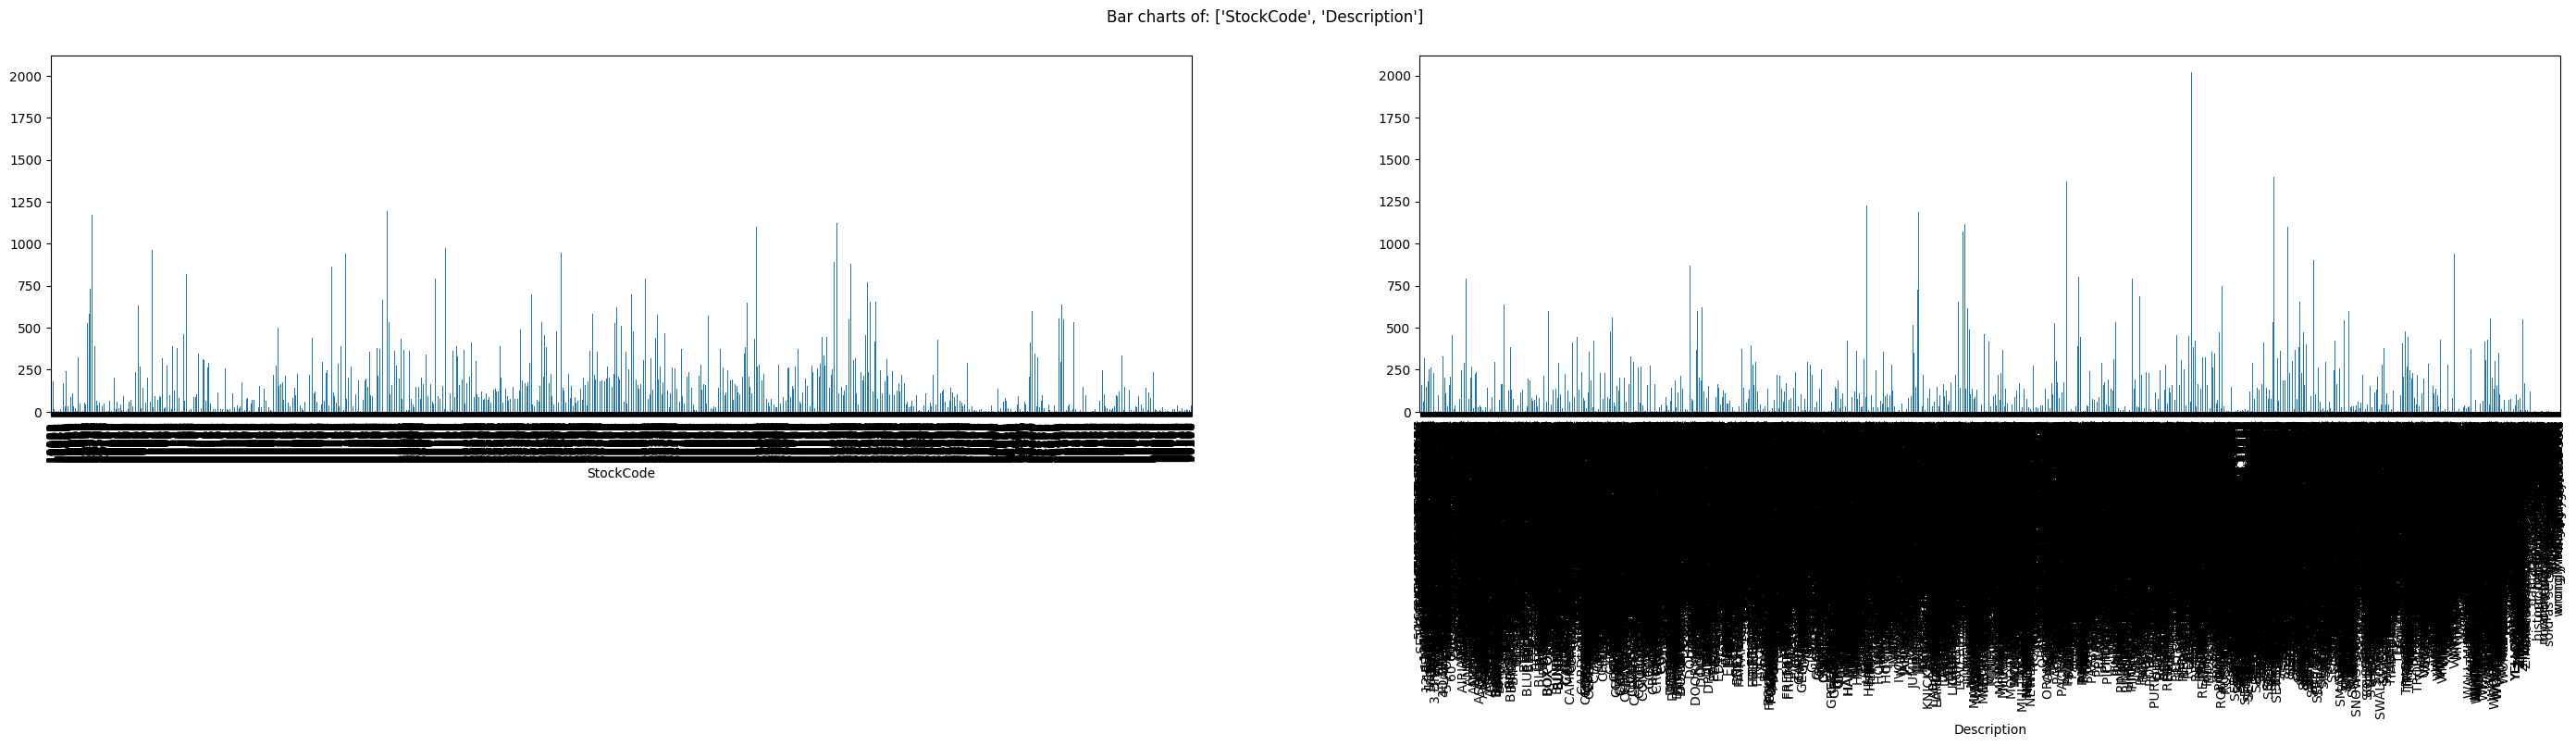

In [ ]:
PlotBarCharts(inpData = df, colsToPlot=["StockCode", "Description"])

In [ ]:
pd.DataFrame(df['StockCode'].value_counts())

StockCode
22423       2022
47566       1707
20725       1595
84879       1490
22197       1426
...          ...
90068          1
20689          1
20738          1
17001          1
23843          1

[2938 rows x 1 columns]

In [ ]:
pd.DataFrame(df['Description'].value_counts())

Description
REGENCY CAKESTAND 3 TIER                   2019
PARTY BUNTING                              1707
LUNCH BAG RED RETROSPOT                    1594
ASSORTED COLOUR BIRD ORNAMENT              1489
SET OF 3 CAKE TINS PANTRY DESIGN           1399
...                                         ...
CAPIZ CHANDELIER                              1
16 PC CUTLERY SET PANTRY DESIGN               1
BAKING MOULD TOFFEE CUP  CHOCOLATE            1
BAKING MOULD CUPCAKE CHOCOLATE                1
PAPER CRAFT , LITTLE BIRDIE                   1

[3214 rows x 1 columns]

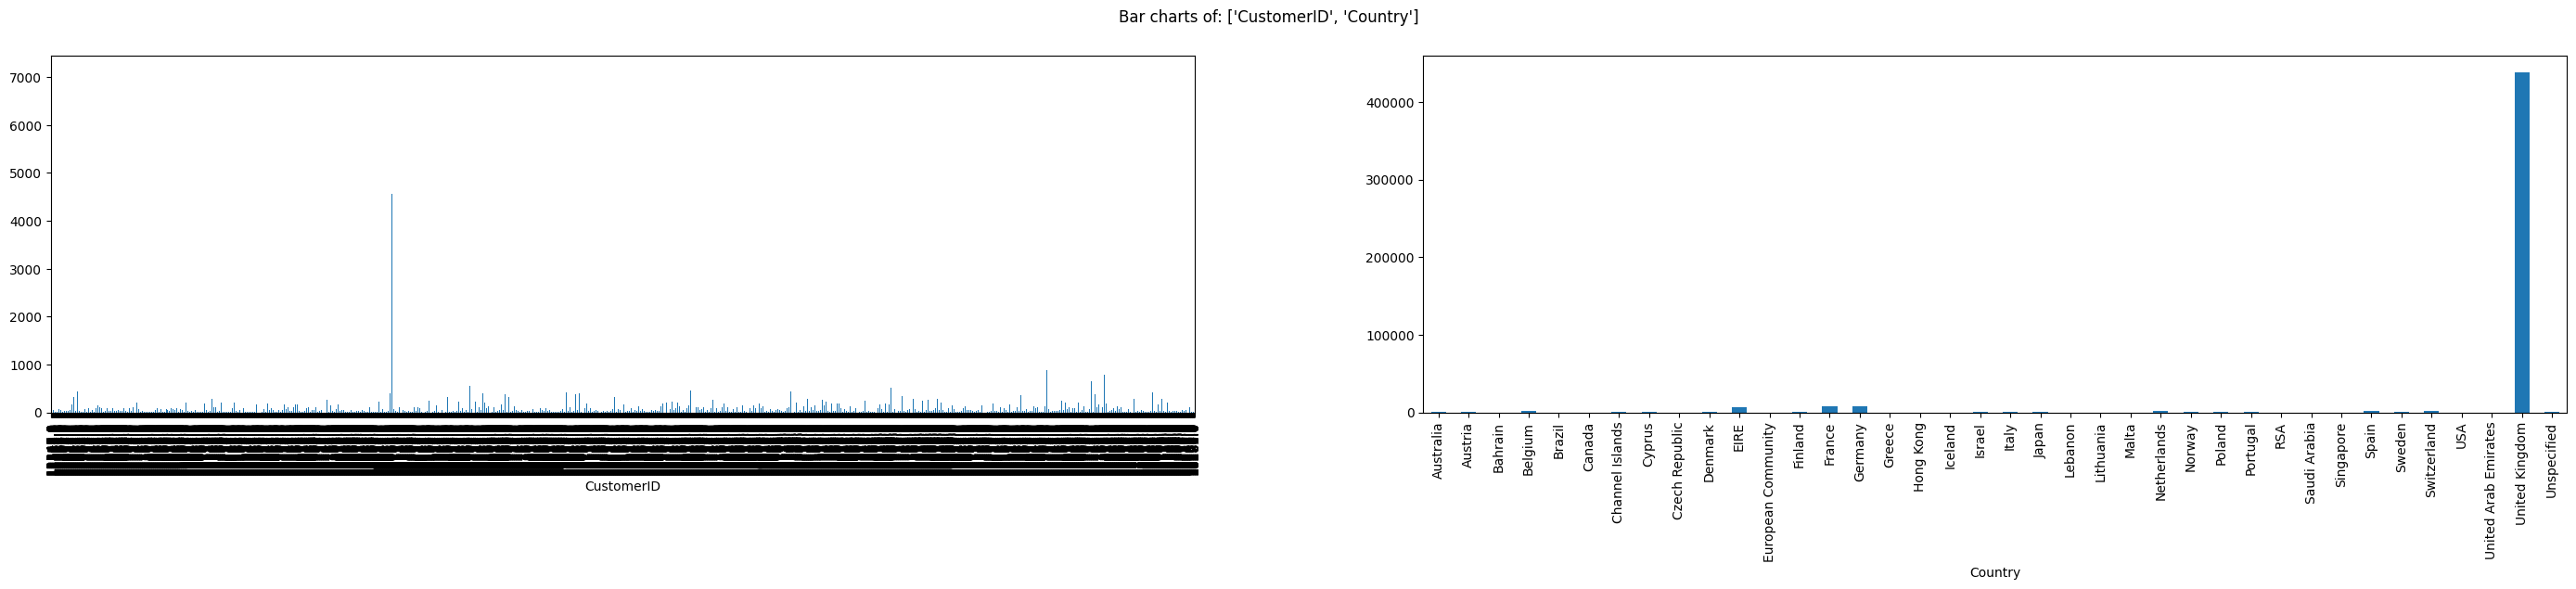

In [ ]:
PlotBarCharts(inpData = df, colsToPlot=["CustomerID", "Country"])

In [ ]:
pd.DataFrame(df['CustomerID'].value_counts())

CustomerID
17841.0        7097
14911.0        5109
14096.0        4558
12748.0        4139
14606.0        2347
...             ...
15945.0           1
18113.0           1
17923.0           1
13270.0           1
13099.0           1

[4315 rows x 1 columns]

In [ ]:
pd.DataFrame(df['Country'].value_counts())

Country
United Kingdom         438129
Germany                  8108
France                   7715
EIRE                     7176
Netherlands              2225
Spain                    2213
Belgium                  1798
Switzerland              1789
Portugal                 1384
Australia                1121
Norway                    978
Channel Islands           705
Italy                     695
Cyprus                    572
Finland                   533
Unspecified               413
Sweden                    410
Austria                   359
Denmark                   337
Japan                     305
Poland                    300
Israel                    269
Hong Kong                 255
Singapore                 199
USA                       167
Iceland                   162
Greece                    135
Canada                    126
Malta                      89
United Arab Emirates       66
RSA                        54
European Community         53
Lebanon                    43
Lithuania                  31
Brazil                     28
Czech Republic             21
Bahrain                    13
Saudi Arabia                9

เมื่อวิเคราะห์ข้อมูลจากกราฟพบว่า StockCode, Description และ CustomerID ข้อมูลค่อนข้างกระจายตัว ส่วน Country ข้อมูลลูกค้าส่วนใหญ่จะอยู้ในประเทศ United Kingdom

## Continuous predictor

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>]], dtype=object)

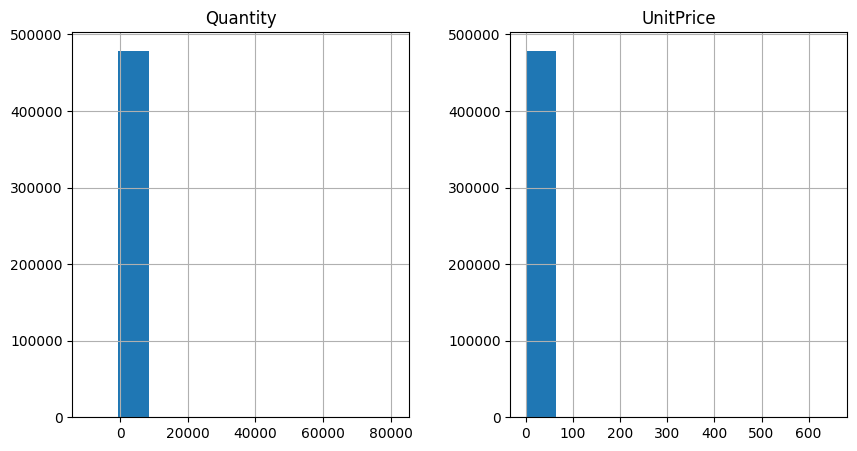

In [ ]:
# Plotting histograms of multiple columns together
df.hist(["Quantity", "UnitPrice"], figsize=(10,5))

<Axes: >

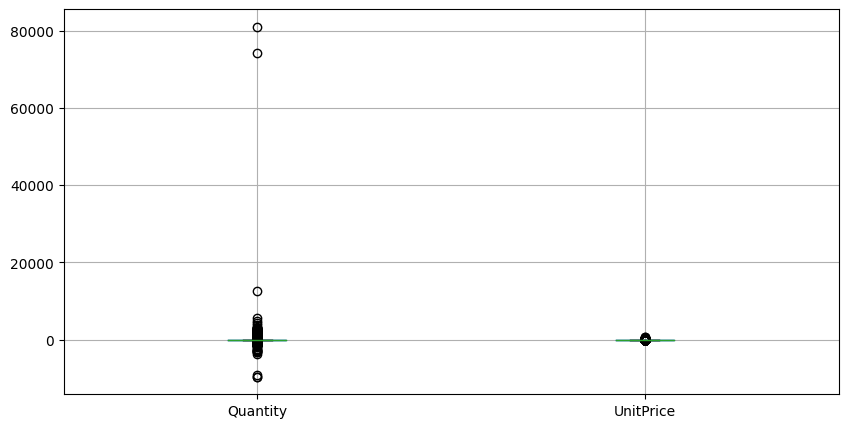

In [ ]:
df.boxplot(["Quantity", "UnitPrice"], figsize=(10,5))

Quantity ที่มากกว่า 60,000 เป็น outlier และ ไม่ควรมีค่าน้อยกว่า 0

UnitPrice ไม่ควรมีค่าน้อยกว่า 0

In [ ]:
clean_df = df[(df["Quantity"] > 0) & (df["Quantity"] < 60000)]
clean_df = clean_df[clean_df["UnitPrice"] > 0]
clean_df = clean_df.reset_index(drop = True, inplace= False)
clean_df = clean_df.dropna().reset_index(drop = True, inplace= False)
clean_df

InvoiceNo StockCode                        Description  Quantity  \
0         536365     71053                WHITE METAL LANTERN         6   
1         536365     22752       SET 7 BABUSHKA NESTING BOXES         2   
2         536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
3         536366     22633             HAND WARMER UNION JACK         6   
4         536366     22632          HAND WARMER RED POLKA DOT         6   
...          ...       ...                                ...       ...   
363080    581587     22613        PACK OF 20 SPACEBOY NAPKINS        12   
363081    581587     22899       CHILDREN'S APRON DOLLY GIRL          6   
363082    581587     23254      CHILDRENS CUTLERY DOLLY GIRL          4   
363083    581587     23255    CHILDRENS CUTLERY CIRCUS PARADE         4   
363084    581587     22138      BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  
0        12/1/2010 8:26       3.39     17850.0  United Kingdom               0  
1        12/1/2010 8:26       7.65     17850.0  United Kingdom               0  
2        12/1/2010 8:26       4.25     17850.0  United Kingdom               0  
3        12/1/2010 8:28       1.85     17850.0  United Kingdom               0  
4        12/1/2010 8:28       1.85     17850.0  United Kingdom               0  
...                 ...        ...         ...             ...             ...  
363080  12/9/2011 12:50       0.85     12680.0          France               0  
363081  12/9/2011 12:50       2.10     12680.0          France               0  
363082  12/9/2011 12:50       4.15     12680.0          France               0  
363083  12/9/2011 12:50       4.15     12680.0          France               0  
363084  12/9/2011 12:50       4.95     12680.0          France               0  

[363085 rows x 9 columns]

<Axes: >

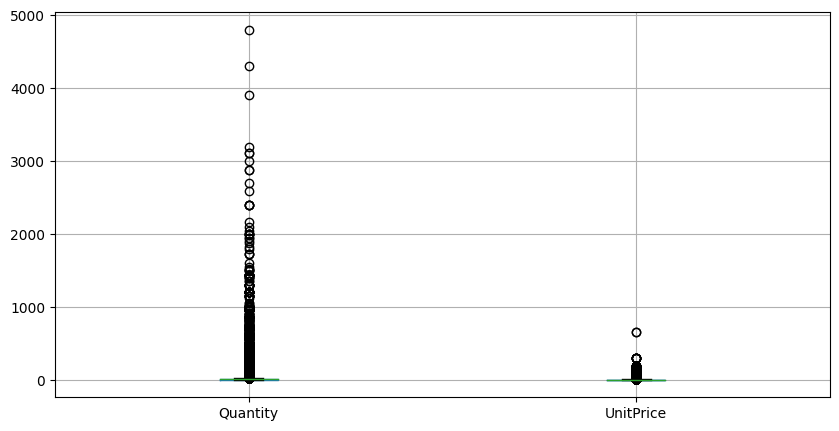

In [ ]:
clean_df.boxplot(["Quantity", "UnitPrice"], figsize=(10,5))

### พิจารณาราคารวมที่ซื้อต่อ Basket

In [ ]:
clean_df['PricePerBasket'] = clean_df['UnitPrice'] * clean_df['Quantity']
perBasket = clean_df.groupby('InvoiceNo').PricePerBasket.sum().reset_index()
perBasket

InvoiceNo  PricePerBasket
0        536365           61.14
1        536366           22.20
2        536367          278.73
3        536368           70.05
4        536369           17.85
...         ...             ...
18213    581583          124.60
18214    581584          140.64
18215    581585          329.05
18216    581586          339.20
18217    581587          249.45

[18218 rows x 2 columns]

In [ ]:
perBasket["PricePerBasket"].describe()

count    18218.000000
mean       426.484594
std        932.492705
min          0.550000
25%        142.505000
50%        271.045000
75%        429.880000
max      38970.000000
Name: PricePerBasket, dtype: float64

<Axes: >

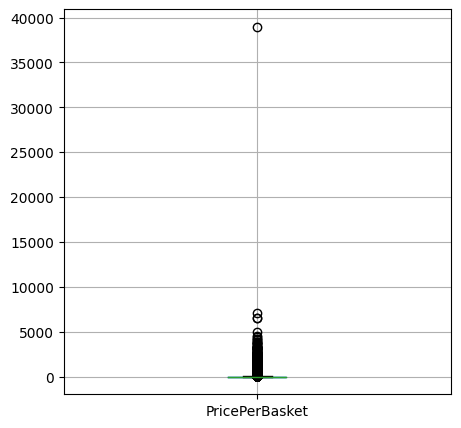

In [ ]:
clean_df.boxplot(["PricePerBasket"], figsize=(5,5))

array([[<Axes: title={'center': 'PricePerBasket'}>]], dtype=object)

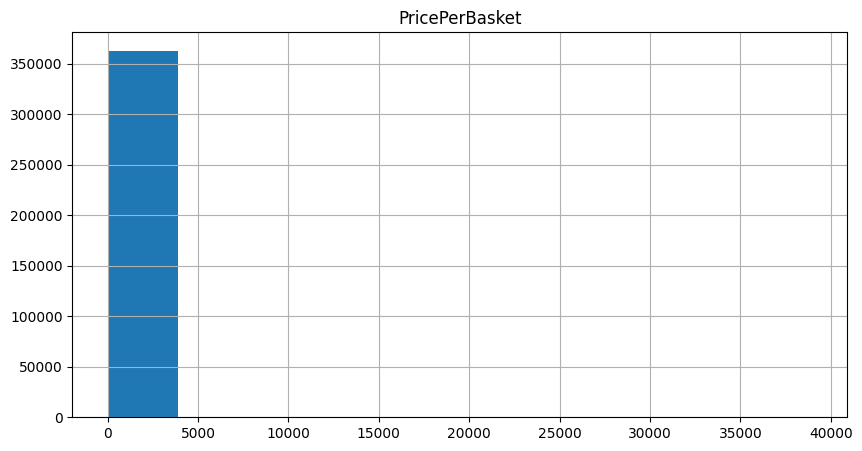

In [ ]:
clean_df.hist(["PricePerBasket"], figsize=(10,5))

จะเห็นได้ว่า ตะกร้าสั่งซื้อที่ซื้อของเกือบ 40,000 USD แต่คนส่วนใหญ่จะซื้อต่อตะกร้าไม่เกิน 5,000 USD

แปลงข้อมูลเป็น Datetime

In [ ]:
clean_df.InvoiceDate = pd.to_datetime(clean_df.InvoiceDate)
clean_df

InvoiceNo StockCode                        Description  Quantity  \
0         536365     71053                WHITE METAL LANTERN         6   
1         536365     22752       SET 7 BABUSHKA NESTING BOXES         2   
2         536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
3         536366     22633             HAND WARMER UNION JACK         6   
4         536366     22632          HAND WARMER RED POLKA DOT         6   
...          ...       ...                                ...       ...   
363080    581587     22613        PACK OF 20 SPACEBOY NAPKINS        12   
363081    581587     22899       CHILDREN'S APRON DOLLY GIRL          6   
363082    581587     23254      CHILDRENS CUTLERY DOLLY GIRL          4   
363083    581587     23255    CHILDRENS CUTLERY CIRCUS PARADE         4   
363084    581587     22138      BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
363080 2011-12-09 12:50:00       0.85     12680.0          France   
363081 2011-12-09 12:50:00       2.10     12680.0          France   
363082 2011-12-09 12:50:00       4.15     12680.0          France   
363083 2011-12-09 12:50:00       4.15     12680.0          France   
363084 2011-12-09 12:50:00       4.95     12680.0          France   

        order_canceled  PricePerBasket  
0                    0           20.34  
1                    0           15.30  
2                    0           25.50  
3                    0           11.10  
4                    0           11.10  
...                ...             ...  
363080               0           10.20  
363081               0           12.60  
363082               0           16.60  
363083               0           16.60  
363084               0           14.85  

[363085 rows x 10 columns]

พิจารณาช่วงวันที่ที่พิจารณาในการแบ่ง Customer Segment

In [ ]:
print(min(clean_df['InvoiceDate']))
print(max(clean_df['InvoiceDate']))

2010-12-01 08:26:00
2011-12-09 12:50:00


ทำการ filter ให้เหลือการข้อมูลตั้งแต่ 2010-12-01 ถึง 2011-12-01 เพื่อแปลง frequency ให้เป็นจำนวนครั้งที่ลูกค้าเข้ามาเกี่ยวข้องกับธุรกิจในระยะเวลา 1 ปี จากตอนแรกเป็นช่วงเวลา 1 ปี 9 วัน

In [ ]:
clean_df = clean_df[clean_df['InvoiceDate'] <= '2011-12-02 00:00:01']
clean_df = clean_df.reset_index(drop = True, inplace= False)
clean_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365     71053                  WHITE METAL LANTERN         6   
1         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
2         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3         536366     22633               HAND WARMER UNION JACK         6   
4         536366     22632            HAND WARMER RED POLKA DOT         6   
...          ...       ...                                  ...       ...   
348970    580137     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971    580137     23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972    580137     23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973    580137     23553          LANDMARK FRAME CAMDEN TOWN          2   
348974    580137     21034         REX CASH+CARRY JUMBO SHOPPER         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
348970 2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971 2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972 2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973 2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974 2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  
0                    0           20.34  
1                    0           15.30  
2                    0           25.50  
3                    0           11.10  
4                    0           11.10  
...                ...             ...  
348970               0            2.55  
348971               0            1.65  
348972               0            3.75  
348973               0           25.00  
348974               0            2.85  

[348975 rows x 10 columns]

In [ ]:
clean_df.to_csv("clean_df.csv", index=False)

#5.Outlier treatment

ยังไม่ทำการตัด Outlier เนื่องจากอาจเป็นพฤติกรรมของข้อมูลลูกค้าที่แตกต่างกัน จึงจะทำการสร้าง model ก่อน ว่าข้อมูลที่สุดโต่ง(ลูกค้าที่มียอดใช้จ่ายสูงมากๆ) จะส่งผลให้ model ผิดแปลกไปหรือไม่

#6.Missing value treatment

In [ ]:
clean_df = pd.read_csv("clean_df.csv")
clean_df

InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1       2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2       2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3       2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4       2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                     ...        ...         ...             ...   
348970  2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971  2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972  2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973  2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974  2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  
0                    0           20.34  
1                    0           15.30  
2                    0           25.50  
3                    0           11.10  
4                    0           11.10  
...                ...             ...  
348970               0            2.55  
348971               0            1.65  
348972               0            3.75  
348973               0           25.00  
348974               0            2.85  

[348975 rows x 10 columns]

In [ ]:
clean_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
order_canceled    0
PricePerBasket    0
dtype: int64

# 7.Create new feature : RFM Analysis

จาก RFM Analysis
- R(Recency) : How recently a customer has engaged with the businesss?
- F(Frequency) : How often a customer interacts with the business?
- M(Monetory) : How much did customers spend in total with the business?

เนื่องจากการ Clustering โดยใช้ K-means ควรใช้ข้อมูลแบบ Numeric ดังนั้นการสร้าง RFM feature เป็นการแปลง feature แบบ Categorical เป็น Feature ใหม่ ที่เป็นชนิด Numeric

Find R

In [ ]:
customer_df = pd.DataFrame(clean_df['CustomerID'].unique())

customer_df.columns = ['CustomerID']

customer_df.head()

CustomerID
0     17850.0
1     13047.0
2     12583.0
3     13748.0
4     15100.0

In [ ]:
first_purchase = clean_df.groupby('CustomerID').InvoiceDate.min().reset_index()
first_purchase.columns = ['CustomerID','MinPurchaseDate']
first_purchase.head()

CustomerID      MinPurchaseDate
0     12347.0  2010-12-07 14:57:00
1     12348.0  2010-12-16 19:09:00
2     12349.0  2011-11-21 09:51:00
3     12350.0  2011-02-02 16:01:00
4     12352.0  2011-02-16 12:33:00

In [ ]:
last_purchase = clean_df.groupby('CustomerID').InvoiceDate.max().reset_index()
last_purchase.columns = ['CustomerID','MaxPurchaseDate']
last_purchase.head()

CustomerID      MaxPurchaseDate
0     12347.0  2011-10-31 12:25:00
1     12348.0  2011-09-25 13:13:00
2     12349.0  2011-11-21 09:51:00
3     12350.0  2011-02-02 16:01:00
4     12352.0  2011-11-03 14:37:00

In [ ]:
# Merge two dataframes
purchase_dates = pd.merge(last_purchase,first_purchase, on='CustomerID',
                              how='left')
purchase_dates.head()

CustomerID      MaxPurchaseDate      MinPurchaseDate
0     12347.0  2011-10-31 12:25:00  2010-12-07 14:57:00
1     12348.0  2011-09-25 13:13:00  2010-12-16 19:09:00
2     12349.0  2011-11-21 09:51:00  2011-11-21 09:51:00
3     12350.0  2011-02-02 16:01:00  2011-02-02 16:01:00
4     12352.0  2011-11-03 14:37:00  2011-02-16 12:33:00

In [ ]:
df_max_purchase = clean_df.groupby('CustomerID').InvoiceDate.max().reset_index()
df_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
df_max_purchase.head()

CustomerID      MaxPurchaseDate
0     12347.0  2011-10-31 12:25:00
1     12348.0  2011-09-25 13:13:00
2     12349.0  2011-11-21 09:51:00
3     12350.0  2011-02-02 16:01:00
4     12352.0  2011-11-03 14:37:00

หาว่า จากครั้งที่ซื้อล่าสุดถึงปัจจุบันห่างกันมากน้อยแค่ไหน ถ้า Recency มาก คือ ลูกค้าซื้อของที่ธุรกิจนี้ล่าสุดนานแล้ว แต่ถ้า Recency น้อย คือ ลูกค้าซื้อของที่ธุรกิจนี้เมื่อไม่นานที่ผ่านมา ในกรณี Recency  = 0 อาจเป็นลูกค้าใหม่ หรือลูกค้าที่พึ่งซื้อล่าสุดของ dataset นี้

หา Recency

In [ ]:
# Find the recency in days
df_max_purchase['Recency'] = (pd.to_datetime(df_max_purchase['MaxPurchaseDate']).max() - pd.to_datetime(df_max_purchase['MaxPurchaseDate'])).dt.days

customer_df = pd.merge(customer_df, df_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
customer_df.head()

CustomerID  Recency
0     17850.0      364
1     13047.0       48
2     12583.0       10
3     13748.0       87
4     15100.0      325

In [ ]:
pd.DataFrame(df_max_purchase.Recency.describe())

Recency
count  4275.000000
mean     90.632047
std      99.066145
min       0.000000
25%      15.000000
50%      49.000000
75%     143.000000
max     365.000000

In [ ]:
import plotly.express as px

hist_fig = px.histogram(customer_df,
                        x="Recency",
                        title="Customers Recency in Days",
                        template= "plotly_white"
                       )

hist_fig.show(config={'displaylogo': False})

In [ ]:
customer_df

CustomerID  Recency
0        17850.0      364
1        13047.0       48
2        12583.0       10
3        13748.0       87
4        15100.0      325
...          ...      ...
4270     15060.0        0
4271     17911.0        1
4272     14804.0        0
4273     15904.0        0
4274     16789.0        0

[4275 rows x 2 columns]

In [ ]:
clean_df = pd.merge(clean_df, customer_df, on='CustomerID',
                              how='left')
clean_df

InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1       2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2       2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3       2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4       2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                     ...        ...         ...             ...   
348970  2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971  2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972  2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973  2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974  2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  Recency  
0                    0           20.34      364  
1                    0           15.30      364  
2                    0           25.50      364  
3                    0           11.10      364  
4                    0           11.10      364  
...                ...             ...      ...  
348970               0            2.55        0  
348971               0            1.65        0  
348972               0            3.75        0  
348973               0           25.00        0  
348974               0            2.85        0  

[348975 rows x 11 columns]

หา F : Frequency

In [ ]:
df_frequency = clean_df.groupby('CustomerID').InvoiceDate.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']

In [ ]:
customer_df = pd.merge(customer_df, df_frequency, on='CustomerID')
customer_df.head()

CustomerID  Recency  Frequency
0     17850.0      364        212
1     13047.0       48        166
2     12583.0       10        214
3     13748.0       87         28
4     15100.0      325          3

In [ ]:
pd.DataFrame(customer_df.Frequency.describe())

Frequency
count  4275.000000
mean     81.631579
std     197.693303
min       1.000000
25%      15.000000
50%      37.000000
75%      88.000000
max    6783.000000

In [ ]:
# plot histogram
hist_fig = px.histogram(customer_df,
                        x="Frequency",
                        title="Customers with Purchase Frequency",
                        template= "plotly_white"
                       )

hist_fig.show(config={'displaylogo': False})

หา M : Monetary(totalPrice)

In [ ]:
clean_df['totalPrice'] = clean_df['Quantity']*clean_df['UnitPrice']
clean_df

InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1       2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2       2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3       2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4       2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                     ...        ...         ...             ...   
348970  2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971  2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972  2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973  2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974  2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  Recency  totalPrice  
0                    0           20.34      364       20.34  
1                    0           15.30      364       15.30  
2                    0           25.50      364       25.50  
3                    0           11.10      364       11.10  
4                    0           11.10      364       11.10  
...                ...             ...      ...         ...  
348970               0            2.55        0        2.55  
348971               0            1.65        0        1.65  
348972               0            3.75        0        3.75  
348973               0           25.00        0       25.00  
348974               0            2.85        0        2.85  

[348975 rows x 12 columns]

In [ ]:
df_revenue = clean_df.groupby('CustomerID').totalPrice.sum().reset_index()
df_revenue

CustomerID  totalPrice
0        12347.0     3449.03
1        12348.0     1437.24
2        12349.0     1372.42
3        12350.0      258.00
4        12352.0     1373.24
...          ...         ...
4270     18280.0      180.60
4271     18281.0       80.82
4272     18282.0      100.21
4273     18283.0     1762.50
4274     18287.0     1220.06

[4275 rows x 2 columns]

In [ ]:
customer_df = pd.merge(customer_df, df_revenue, on='CustomerID',
                              how='left')
customer_df

CustomerID  Recency  Frequency  totalPrice
0        17850.0      364        212     3689.25
1        13047.0       48        166     3125.79
2        12583.0       10        214     6064.61
3        13748.0       87         28      948.25
4        15100.0      325          3      876.00
...          ...      ...        ...         ...
4270     15060.0        0        100      276.85
4271     17911.0        1         33      314.24
4272     14804.0        0          9      274.97
4273     15904.0        0         30      164.68
4274     16789.0        0          5       80.80

[4275 rows x 4 columns]

In [ ]:
pd.DataFrame(customer_df['totalPrice'].describe())

totalPrice
count    4275.000000
mean     1750.883153
std      7706.053316
min         2.900000
25%       268.730000
50%       604.800000
75%      1441.100000
max    253484.140000

In [ ]:
# plot histogram
hist_fig = px.histogram(customer_df,
                        x="totalPrice",
                        title="Customers with totalPrice",
                        template= "plotly_white"
                       )

hist_fig.show(config={'displaylogo': False})

In [ ]:
customer_df.to_csv("RFM_df.csv", index=False)

In [ ]:
customer_df = pd.read_csv("RFM_df.csv")
customer_df

CustomerID  Recency  Frequency  totalPrice
0        17850.0      364        212     3689.25
1        13047.0       48        166     3125.79
2        12583.0       10        214     6064.61
3        13748.0       87         28      948.25
4        15100.0      325          3      876.00
...          ...      ...        ...         ...
4270     15060.0        0        100      276.85
4271     17911.0        1         33      314.24
4272     14804.0        0          9      274.97
4273     15904.0        0         30      164.68
4274     16789.0        0          5       80.80

[4275 rows x 4 columns]

# **8. Explore by Visual correlation analysis and Statistical measurement**

## **8.1 Relationship exploration: Continuous Vs Continuous**

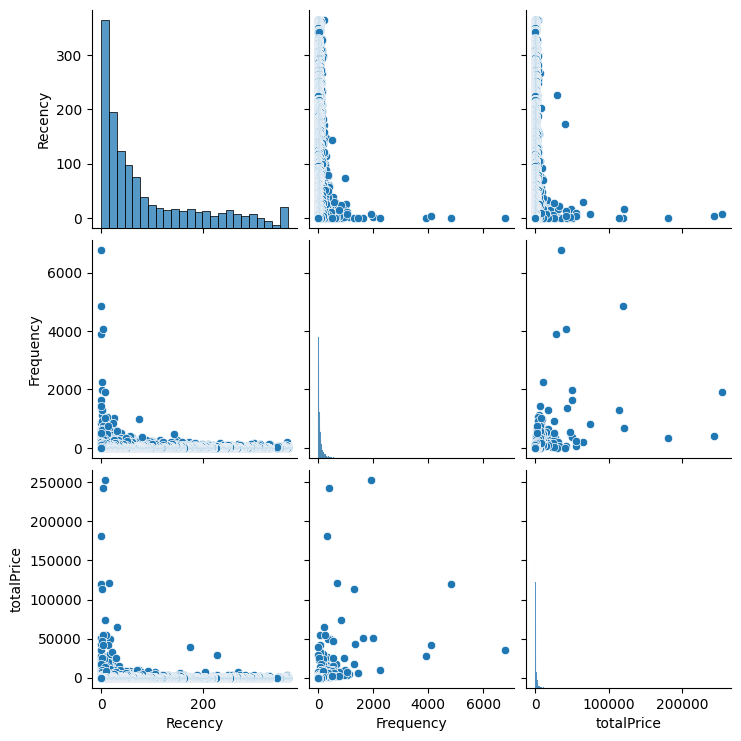

In [ ]:
sns.pairplot(customer_df[['Recency', 'Frequency', 'totalPrice']])

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Recency', 'Frequency', 'totalPrice']

# Creating the correlation matrix
CorrelationData=customer_df[ContinuousCols].corr()
CorrelationData

Recency  Frequency  totalPrice
Recency     1.000000  -0.209047   -0.124827
Frequency  -0.209047   1.000000    0.432474
totalPrice -0.124827   0.432474    1.000000

เมื่อลองดูค่าจาก Correlation Matrix พบว่า

- Recency และ Frequency มีค่า Negative Correlation เล็กน้อย
- Recency และ totalPrice มีค่า Negative Correlation เล็กน้อย
- Frequency และ totalPrice มีค่า Positive Correlation ปานกลาง

<Axes: xlabel='Recency', ylabel='Count'>

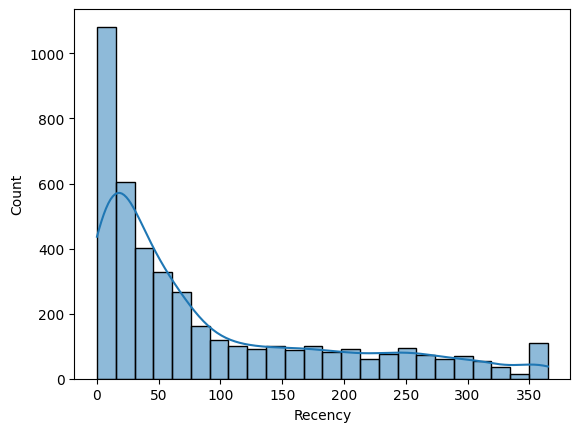

In [ ]:
sns.histplot(data=customer_df, x="Recency", kde=True)

<Axes: xlabel='Frequency', ylabel='Count'>

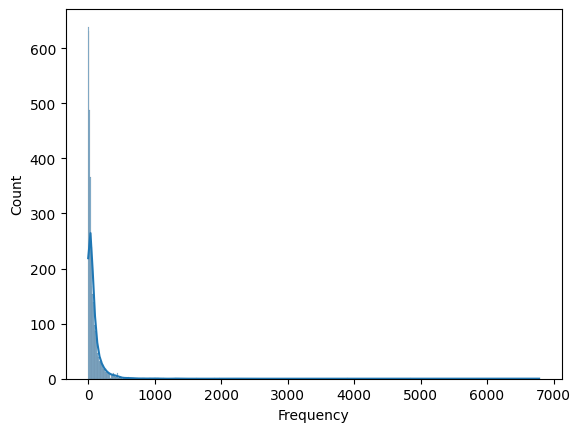

In [ ]:
sns.histplot(data=customer_df, x="Frequency", kde=True)

<Axes: xlabel='totalPrice', ylabel='Count'>

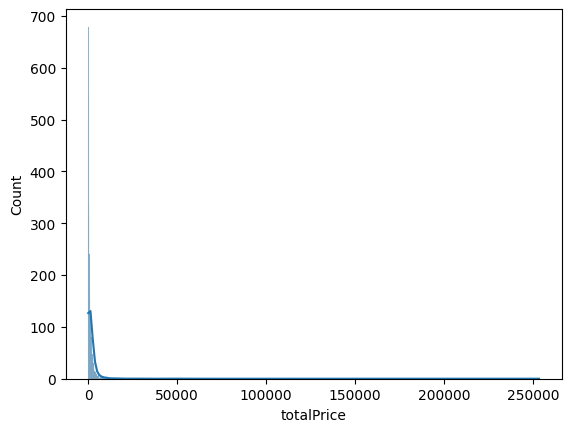

In [ ]:
sns.histplot(data=customer_df, x="totalPrice", kde=True)

#9.Selecting final predictors for Machine Learning summary

R(Recency) : How recently a customer has engaged with the businesss?

F(Frequency) : How often a customer interacts with the business?

M(Monetory) : How much did customers spend in total with the business?

เลือกใช้ทั้ง Recency, Frequency และ Monetory ตามทฤษฎีของ RFM Analysis ส่วน Feature อื่นๆ ทำการตัดทิ้งไป เนื่องจาก RFM ได้เป็นการคำนวณจาก Feature อื่นๆแล้ว เพื่อให้ข้อมูลเป็นไปในรูปแบบ Numeric อย่างไรก็ตาม หลังจากทำการ Clustering แล้ว จะมีการวิเคราะห์ย้อนกลับถึงแต่ละ Feature ที่ตัดทิ้งไป

#10.Data Preprocessing

สร้างตัวแปร customer_df_backup เพื่อเก็บค่า RFM ก่อนนำไป Normalization

In [ ]:
customer_df_backup = pd.read_csv("RFM_df.csv")
customer_df_backup = customer_df_backup.rename(columns ={ "Recency":"Recency_backup", "Frequency":"Frequency_backup", "totalPrice":"totalPrice_backup"})
customer_df_backup

CustomerID  Recency_backup  Frequency_backup  totalPrice_backup
0        17850.0             364               212            3689.25
1        13047.0              48               166            3125.79
2        12583.0              10               214            6064.61
3        13748.0              87                28             948.25
4        15100.0             325                 3             876.00
...          ...             ...               ...                ...
4270     15060.0               0               100             276.85
4271     17911.0               1                33             314.24
4272     14804.0               0                 9             274.97
4273     15904.0               0                30             164.68
4274     16789.0               0                 5              80.80

[4275 rows x 4 columns]

Normalization : การนำข้อมูลมาแปลงค่าให้อยู่ในช่วงตั้งแต่ [0, 1] เนื่องจากข้อมูลมีการกระจายตัวไม่ปกติ

In [ ]:
from sklearn import preprocessing
dataforNormalize = customer_df[['Recency', 'Frequency', 'totalPrice']]
normalized_data = preprocessing.normalize(dataforNormalize)
normalized_data = pd.DataFrame(normalized_data)

normalized_data = pd.concat([normalized_data, customer_df['CustomerID']],  axis = 1)
normalized_data = normalized_data.rename(columns ={0: "Recency", 1: "Frequency", 2: "totalPrice"})

customer_df = normalized_data
customer_df

Recency  Frequency  totalPrice  CustomerID
0     0.098028   0.057093    0.993545     17850.0
1     0.015333   0.053026    0.998475     13047.0
2     0.001648   0.035265    0.999377     12583.0
3     0.091325   0.029392    0.995387     13748.0
4     0.347835   0.003211    0.937550     15100.0
...        ...        ...         ...         ...
4270  0.000000   0.339724    0.940525     15060.0
4271  0.003165   0.104440    0.994526     17911.0
4272  0.000000   0.032713    0.999465     14804.0
4273  0.000000   0.179222    0.983809     15904.0
4274  0.000000   0.061763    0.998091     16789.0

[4275 rows x 4 columns]

In [ ]:
customer_df.describe()

Recency    Frequency   totalPrice    CustomerID
count  4275.000000  4275.000000  4275.000000   4275.000000
mean      0.227050     0.068062     0.905670  15298.847251
std       0.294446     0.057714     0.183242   1718.927405
min       0.000000     0.000075     0.014718  12347.000000
25%       0.013510     0.034919     0.930224  13815.500000
50%       0.075412     0.052739     0.990880  15292.000000
75%       0.351900     0.072923     0.998079  16776.500000
max       0.999840     0.409810     0.999999  18287.000000

<Axes: >

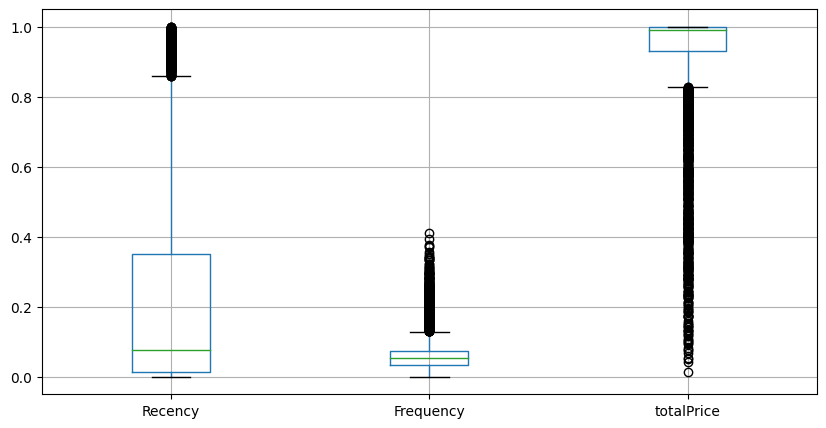

In [ ]:
customer_df.boxplot(["Recency", "Frequency", "totalPrice"], figsize=(10,5))

ค่า Recency, Frequency และ totalPrice ไม่ใช่ค่าจริง แต่เป็นค่าที่ผ่านการ scale เพื่อให้เข้าใจง่าย

#11.Model Construction

เนื่องจากเป็นปัญหา Clustering จึงทำการทดลองแบ่งกลุ่มลูกค้า โดยใช้หลักการ RFM Analysis

ผู้จัดทำเลือกใช้ K-means Clustering ในการแบ่งกลุ่มลูกค้า เนื่องจากต้องการจัดกลุ่มลูกค้าขึ้นมาใหม่ โดยไม่มีหมวดหมู่ใดๆกำกับมาก่อน ซึ่งการจัดกลุ่มด้วย K-Means จะคิดจากการวัดระยะห่างของข้อมูล

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

In [ ]:
customer_df

Recency  Frequency  totalPrice  CustomerID
0     0.098028   0.057093    0.993545     17850.0
1     0.015333   0.053026    0.998475     13047.0
2     0.001648   0.035265    0.999377     12583.0
3     0.091325   0.029392    0.995387     13748.0
4     0.347835   0.003211    0.937550     15100.0
...        ...        ...         ...         ...
4270  0.000000   0.339724    0.940525     15060.0
4271  0.003165   0.104440    0.994526     17911.0
4272  0.000000   0.032713    0.999465     14804.0
4273  0.000000   0.179222    0.983809     15904.0
4274  0.000000   0.061763    0.998091     16789.0

[4275 rows x 4 columns]

Within-Cluster-Sum-of-Squares (WCSS) คือ ผลรวมของระยะห่างระหว่าง Object กับ Centroid โดยคำนวณจากค่า Inertia ซึ่งเป็นค่าผลรวมของระยะห่างจากทุกจุดไปยังจุดศูนย์กลางนั้น ๆ

In [ ]:
my_dict={}
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(customer_df[['Recency', 'Frequency', 'totalPrice']])
    customer_df["Segment"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title="WCSS for Different Numbers of Clusters",
                       xaxis_title="Number of Clusters",
                       yaxis_title="WCSS"
                      )


line_fig.show(config={'displaylogo': False})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

พิจารณา Elbow Method เพื่อหา Optimal Point คือ จุดที่หักศอก จากกราฟพบว่าที่ K=2 จะเป็นจุดที่หักศอกมากที่สุด

Silhouette Score คือ ค่าเป็นที่ใช้วัดว่า Instance ว่าเหมือนกับ Cluster ที่มันอยู่มากน้อยแค่ไหน เมื่อเทียบกับ Cluster กลุ่มอื่น ๆ ค่าของ Silhouette score จะอยู่ในช่วง [-1,1] โดยค่า Sihouette Score ยิ่งมาก Instance ก็จะมีความคล้ายกับ Cluster ของกลุ่มตัวเองมาก และมีความคล้ายกับ Cluster กลุ่มอื่น ๆ น้อย เราจึงพยายามจะหา K ที่ทำให้ Sihouette Score มีค่ามากที่สุด

In [ ]:
from sklearn.metrics import silhouette_score

my_dict = {}

for idx in range(2, 10):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(customer_df[['Recency', 'Frequency', 'totalPrice']])
    customer_df["Segment"] = kmeans.labels_
    silhouette_avg = silhouette_score(customer_df[['Recency', 'Frequency', 'totalPrice']], kmeans.labels_)
    my_dict[idx] = silhouette_avg

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title="Silhouette Score for Different Numbers of Clusters",
                       xaxis_title="Number of Clusters",
                       yaxis_title="Silhouette Score"
                      )

line_fig.show(config={'displaylogo': False})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

จาก Silhouette Score for Different Numbers of Clusters พบว่า Number of Clusters(K) ที่ทำให้ Silhououette Score มีค่าที่มากที่สุด คือ K=2

จากการพิจารณาทั้ง 2 กราฟ จึงเลือกใช้ค่า Number of Clusters(K) = 2

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(customer_df[['Recency', 'Frequency', 'totalPrice']])
customer_df['Segment'] = kmeans.predict(customer_df[['Recency', 'Frequency', 'totalPrice']])
customer_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Recency  Frequency  totalPrice  CustomerID  Segment
0  0.098028   0.057093    0.993545     17850.0        0
1  0.015333   0.053026    0.998475     13047.0        0
2  0.001648   0.035265    0.999377     12583.0        0
3  0.091325   0.029392    0.995387     13748.0        0
4  0.347835   0.003211    0.937550     15100.0        0

In [ ]:
# Find centroids
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

Centroids:
[[0.09106481 0.07262262 0.98448769]
 [0.75092463 0.0504933  0.60202791]]


In [ ]:
customer_df.to_csv("FeatureWithCluster.csv", index=False)

พิจารณา Segment0

In [ ]:
Segment0 = customer_df[customer_df['Segment'] == 0]
Segment0

Recency  Frequency  totalPrice  CustomerID  Segment
0     0.098028   0.057093    0.993545     17850.0        0
1     0.015333   0.053026    0.998475     13047.0        0
2     0.001648   0.035265    0.999377     12583.0        0
3     0.091325   0.029392    0.995387     13748.0        0
4     0.347835   0.003211    0.937550     15100.0        0
...        ...        ...         ...         ...      ...
4270  0.000000   0.339724    0.940525     15060.0        0
4271  0.003165   0.104440    0.994526     17911.0        0
4272  0.000000   0.032713    0.999465     14804.0        0
4273  0.000000   0.179222    0.983809     15904.0        0
4274  0.000000   0.061763    0.998091     16789.0        0

[3393 rows x 5 columns]

<Axes: >

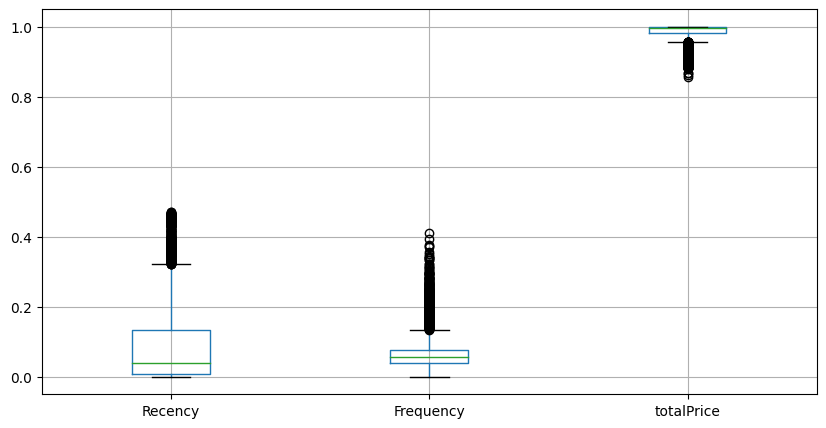

In [ ]:
Segment0.boxplot(["Recency", "Frequency", "totalPrice"], figsize=(10,5))

เมื่อลอง plot boxplot ดูความสัมพันธ์ระหว่าง Recency, Frequency และ totalPrice ของ Segment0 พบว่า Recency และ Frequency มีค่า median ที่ใกล้เคียงกัน ส่วน totalPrice ข้อมูลจะมีช่วงข้อมูลที่แตกต่างกันกับ feature อื่น

In [ ]:
Segment0 = pd.read_csv('data_segment0.csv')
Segment0

CustomerID  InvoiceNo  PricePerBasket   Recency  Frequency  totalPrice  \
0         17850.0     536365           61.14  0.098028   0.057093    0.993545   
1         17850.0     536366           22.20  0.098028   0.057093    0.993545   
2         17850.0     536372           22.20  0.098028   0.057093    0.993545   
3         17850.0     536373          166.58  0.098028   0.057093    0.993545   
4         17850.0     536375          166.58  0.098028   0.057093    0.993545   
...           ...        ...             ...       ...        ...         ...   
16471     15060.0     580069           16.61  0.000000   0.339724    0.940525   
16472     17911.0     579754          314.24  0.003165   0.104440    0.994526   
16473     14804.0     579990          274.97  0.000000   0.032713    0.999465   
16474     15904.0     580094          164.68  0.000000   0.179222    0.983809   
16475     16789.0     580102           80.80  0.000000   0.061763    0.998091   

       Segment  Recency_backup  Frequency_backup  totalPrice_backup  
0            0             364               212            3689.25  
1            0             364               212            3689.25  
2            0             364               212            3689.25  
3            0             364               212            3689.25  
4            0             364               212            3689.25  
...        ...             ...               ...                ...  
16471        0               0               100             276.85  
16472        0               1                33             314.24  
16473        0               0                 9             274.97  
16474        0               0                30             164.68  
16475        0               0                 5              80.80  

[16476 rows x 10 columns]

array([[<Axes: title={'center': 'Recency'}>]], dtype=object)

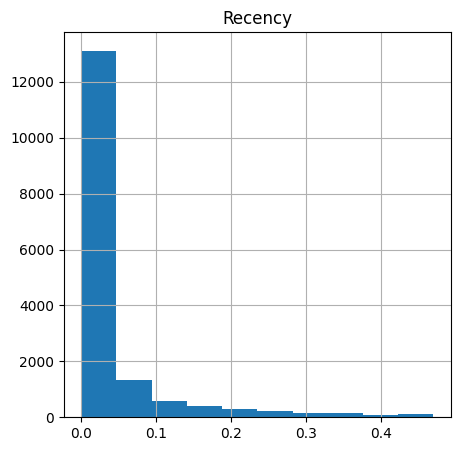

In [ ]:
Segment0.hist(["Recency"], figsize=(5,5))

Recency ของ Segment 0 ข้อมูลมีลักษณะเบ้ขวาพบว่า ข้อมูลกระจุกตัวในช่วง 0 ถึง 0.1

array([[<Axes: title={'center': 'Frequency'}>]], dtype=object)

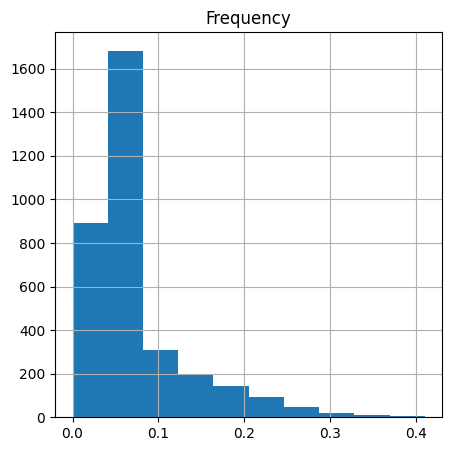

In [ ]:
Segment0.hist(["Frequency"], figsize=(5,5))

Frequency ของ Segment 0 ข้อมูลมีลักษณะเบ้ขวา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0 ถึง 0.1

array([[<Axes: title={'center': 'totalPrice'}>]], dtype=object)

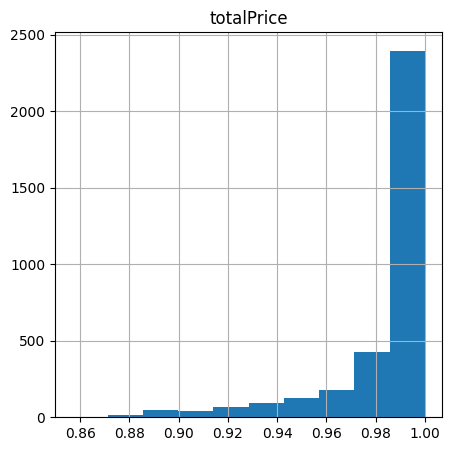

In [ ]:
Segment0.hist(["totalPrice"], figsize=(5,5))

totalPrice ของ Segment 0 ข้อมูลมีลักษณะเบ้ซ้าย พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0.98 ถึง 1

พิจารณา Segment1

In [ ]:
Segment1 = customer_df[customer_df['Segment'] == 1]
Segment1

Recency  Frequency  totalPrice  CustomerID  Segment
10    0.597557   0.021283    0.801544     18074.0        1
13    0.544056   0.051610    0.837460     16250.0        1
17    0.977033   0.002677    0.213073     13747.0        1
23    0.899201   0.002464    0.437529     12791.0        1
27    0.907407   0.116844    0.403684     17908.0        1
...        ...        ...         ...         ...      ...
3859  0.688638   0.282518    0.667803     17836.0        1
3864  0.489061   0.203775    0.848113     15516.0        1
3958  0.567327   0.037822    0.822624     15423.0        1
4019  0.576251   0.046100    0.815972     17831.0        1
4149  0.626249   0.044732    0.778338     12445.0        1

[882 rows x 5 columns]

<Axes: >

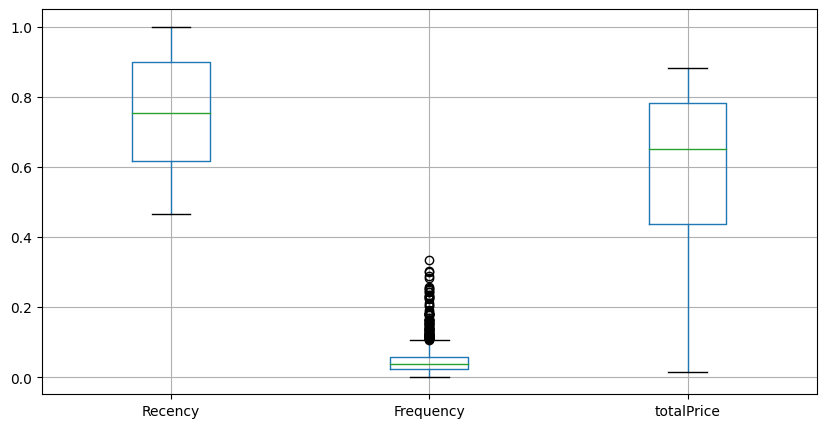

In [ ]:
Segment1.boxplot(["Recency", "Frequency", "totalPrice"], figsize=(10,5))

เมื่อลอง plot boxplot ดูความสัมพันธ์ระหว่าง Recency, Frequency และ totalPrice ของ Segment1 พบว่า Recency และ totalPrice มีค่า median ที่ใกล้เคียงกัน ส่วน Frequency ข้อมูลจะมีช่วงข้อมูลที่แตกต่างกันกับ feature อื่น

array([[<Axes: title={'center': 'Recency'}>]], dtype=object)

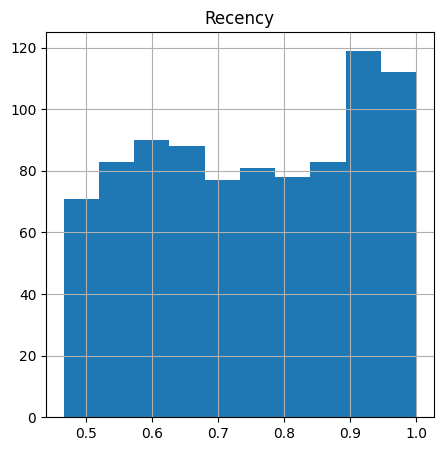

In [ ]:
Segment1.hist(["Recency"], figsize=(5,5))

Recency ของ Segment 1 ข้อมูลมีลักษณะ  bimodal distribution พบว่า ข้อมูลกระจุกตัวในช่วง 0.9 ถึง 1 และข้อมูลกระจุกตัวรองลงมาในช่วง 0.55 - 0.65

array([[<Axes: title={'center': 'Frequency'}>]], dtype=object)

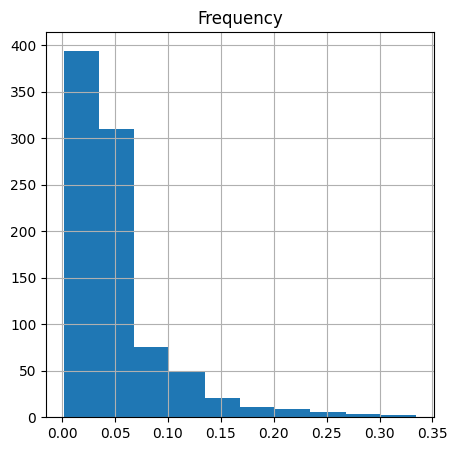

In [ ]:
Segment1.hist(["Frequency"], figsize=(5,5))

Frequency ของ Segment 1 ข้อมูลมีลักษณะเบ้ขวา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0.01 ถึง 0.05

array([[<Axes: title={'center': 'totalPrice'}>]], dtype=object)

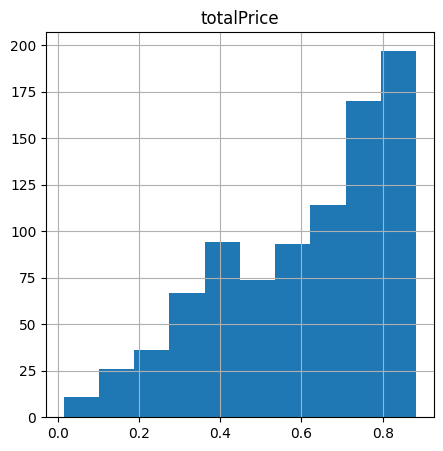

In [ ]:
Segment1.hist(["totalPrice"], figsize=(5,5))

totalPrice ของ Segment 1 ข้อมูลมีลักษณะเบ้ซ้าย พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0.7 ถึง 0.9

ลองเปรียบเทียบค่า Recency, Frequency และ totalPrice ของ Segment 0 และ Segment 1

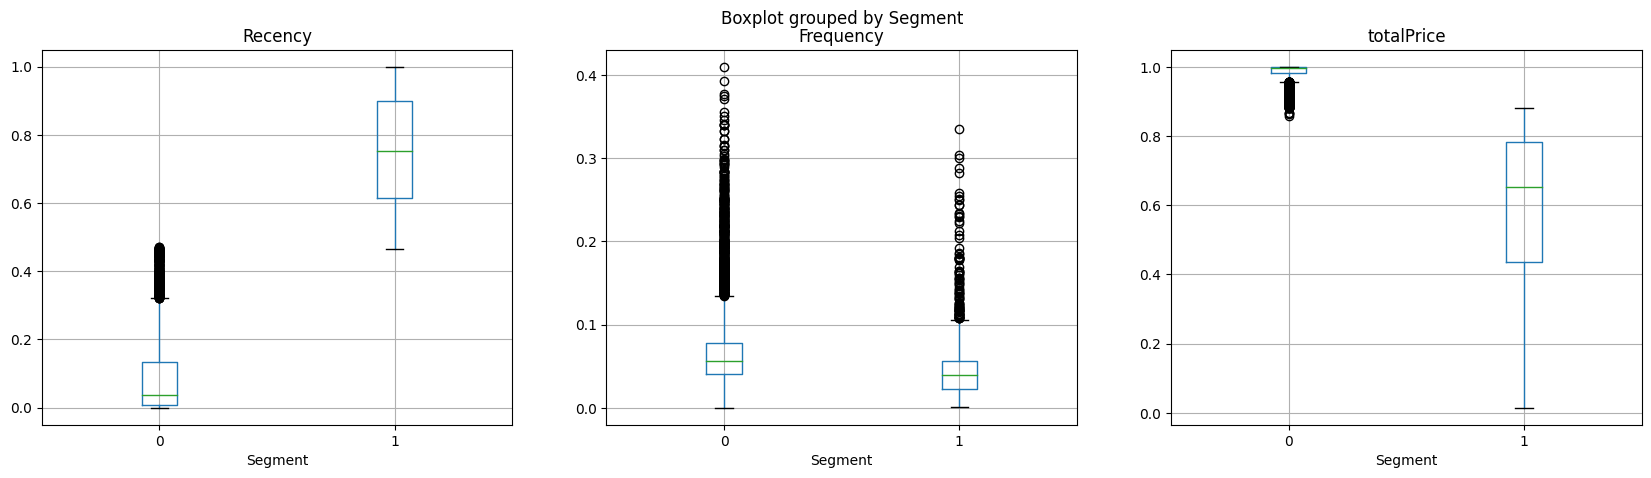

In [ ]:
ContinuousColsList=["Recency", "Frequency", "totalPrice"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(20,5))

for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    customer_df.boxplot(column=PredictorCol, by='Segment', figsize=(5,5), vert=True, ax=PlotCanvas[i])

เมื่อพิจารณาความสัมพันธ์ของทั้งสอง Cluster พบว่า

- Recency : จาก boxplot เห็นได้ชัดว่า Recency ของ Segment0 และ Segment1 แยกออกจากกัน แทบจะไม่มีช่วงที่ข้อมูลทับซ้อนกัน โดย Segment0 ข้อมูลจะกระจุกตัวในช่วงน้อยกว่า 0.2 ส่วน Segment1 ข้อมูลจะกระจุกตัวในช่วงมากกว่า 0.4 ซึ่งถือว่า Recency เป็น Feature ที่มีความสำคัญในการแบ่งกลุ่ม Customer Segment

- Frequency : จาก boxplot แสดงให้เห็นว่า Frequency มีความคลุมเครือกันระหว่าง Segment0 และ Segment1 โดย Segment0 ค่า median ของ Frequency จะมีค่าสูงกว่าของ Segment1 เล็กน้อย

- Segment : จาก boxplot แสดงให้เห็นว่า totalPrice ของ Segment0 และ Segment1 แยกออกจากกัน โดยค่า median ของ Segment0 มีค่าเข้าใกล้ 1 ส่วนค่า mean ของ Segment1 มีค่าประมาณ 0.65

อย่างไรก็ตาม ค่า Recency, Frequency และ totalPrice เป็นค่าที่ผ่านการ Scale เพื่อให้เข้าใจง่าย ซึ่งผู้จัดทำจะมีการอธิบายลงลึก โดย match กลับไปยังข้อมูลก่อนการ Scale ภายหลัง

In [ ]:
#Calcutate distance
def get_distance(X,Y,x_point,y_point):
  return np.sort(np.sqrt((X-x_point)**2 + (Y-y_point)**2))

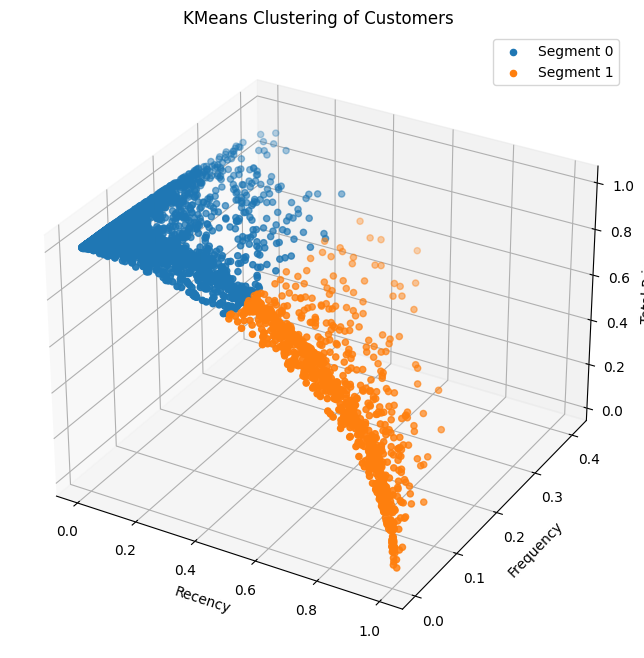

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(2):
    cluster_data = customer_df[customer_df['Segment'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['totalPrice'], label=f'Segment {cluster}')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Total Price')
ax.set_title('KMeans Clustering of Customers')

# Show legend
ax.legend()

# Show the plot
plt.show()

จาก 3d plot พบว่า ข้อมูลแบ่งออกจากกันเป็น 2 Cluster โดย Segment0 แทนด้วยสีน้ำเงิน ส่วน Segment1 แทนด้วยสีส้ม เมื่อพิจารณาดูแนวโน้มของข้อมูล Segment0 จะเป็นกลุ่มลูกค้าที่มี Recency, Frequency ค่อนข้างต่ำ และมี totalPrice ค่อนข้างสูง ส่วน Segment1 จะเป็นกลุ่มลูกค้าที่มี Recency ค่อนข้างสูง, Frequency และ totalPrice ค่อนข้างต่ำ นอกจากนี้แล้ว ยังสังเกตได้ว่า ค่า Frequency และ Recency จะกระจุกตัวอยู่ค่าค่อนข้างต่ำ(น้อยกว่า 0.2)

จากนั้นหา centroid ของ Recency, Frequency และ totalPrice ของแต่ละ cluster เมื่อ index0 คือ ข้อมูล centroid ของ Segment0 และ index1 คือ ข้อมูล centroid ของ Segment1

In [ ]:
centroid_df = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'totalPrice'])
centroid_df

Recency  Frequency  totalPrice
0  0.091065   0.072623    0.984488
1  0.750925   0.050493    0.602028

แปลงจาก DataFrame เป็น list

In [ ]:
centroid_list = centroid_df.values.tolist()
centroid_list

[[0.09106480614999743, 0.0726226209468305, 0.984487693665626],
 [0.7509246263160148, 0.050493304092921396, 0.602027906060294]]

Plot ดูขนาดของ Centroid ในแต่ละ Cluster เพื่อดูพฤติกรรมในแต่ละ Feature

In [ ]:
import plotly.express as px

fig = px.line_polar(centroid_df, r=centroid_list[0], theta=['Recency', 'Frequency', 'totalPrice'],
                    line_close=True, template='plotly_dark')

fig.update_traces(line=dict(color='blue'), name='Segment 0')

fig.add_trace(px.line_polar(centroid_df, r=centroid_list[1], theta=['Recency', 'Frequency', 'totalPrice'],
                            line_close=True, template='plotly_dark').update_traces(line=dict(color='orange'), name='Segment 1').data[0])

fig.show()

จากการ plot line_polar เป็นการ plot centroid ของ Recency, Frequency และ totalPrice ในแต่ละ cluster เมื่อ
- Segment0 คือ Customer Segment กลุ่มที่ 0(เส้นสีน้ำเงิน)
- Segment1 คือ Customer Segment กลุ่มที่ 1(เส้นสีส้ม)

เมื่อ Centroid ของแต่ละ Feature ของ Segment 0 เป็นดังนี้
- Recency : 0.091065
- Frequency : 0.072623
- totalPrice : 0.984488

เมื่อ Centroid ของแต่ละ Feature ของ Segment 1 เป็นดังนี้
- Recency : 0.750925
- Frequency : 0.050493
- totalPrice : 0.602028


พบว่า
- Centroid ของ Recency ของ Segment1 มีค่ามากกว่า Centroid ของ Recency ของ Segment0 อย่างเห็นได้ชัด นั่นคือ ลูกค้าที่มีค่า Recency มาก มีโอกาสที่จะเป็นลูกค้า Segment1
- Centroid ของ Frequency ของ Segment0 และ Segment1 มีค่าค่อนข้างใกล้เคียงกัน ดังนั้น Frequency อาจมีผลต่อการแบ่ง Customer Segment เพียงเล็กน้อย
- Centroid ของ totalPrice ของ Segment1 มีค่าน้อยกว่า Centroid ของ totalPrice ของ Segment0 อย่างเห็นได้ชัด นั่นคือ ลูกค้าที่มี totalPrice มากจะมีโอกาสเป็นลูกค้า Segment0

จาก RFM Analysis
- R(Recency) : How recently a customer has engaged with the businesss?
- F(Frequency) : How often a customer interacts with the business?
- M(Monetory) : How much did customers spend in total with the business?

สามารถสรุปคุณลักษณะของ Cluster ได้คล่าวๆดังนี้
- Segment0 : กลุ่มลูกค้าที่มียอดใช้จ่ายสูง ลูกค้ามาซื้อของที่ธุรกิจนี้บ่อย แต่เป็นกลุ่มลูกค้าใหม่หรือลูกค้าประจำ ที่พึ่งมาซื้อครั้งล่าสุดไม่นานนัก
- Segment1 : กลุ่มลูกค้าที่มียอดใช้จ่ายน้อย ลูกค้ามาซื้อของที่ธุรกิจนี้ไม่บ่อยนัก แต่จะเป็นกลุ่มลูกค้าเก่า กลุ่มที่ครั้งที่มาซื้อล่าสุดนานแล้ว


#12.Result Analysis

### พิจารณาข้อมูลทั่วไปลูกค้า Segment0

In [ ]:
data_segment0 = pd.merge(Segment0, customer_df_backup, on= "CustomerID")
data_segment0

Recency  Frequency  totalPrice  CustomerID  Segment  Recency_backup  \
0     0.098028   0.057093    0.993545     17850.0        0             364   
1     0.015333   0.053026    0.998475     13047.0        0              48   
2     0.001648   0.035265    0.999377     12583.0        0              10   
3     0.091325   0.029392    0.995387     13748.0        0              87   
4     0.347835   0.003211    0.937550     15100.0        0             325   
...        ...        ...         ...         ...      ...             ...   
3388  0.000000   0.339724    0.940525     15060.0        0               0   
3389  0.003165   0.104440    0.994526     17911.0        0               1   
3390  0.000000   0.032713    0.999465     14804.0        0               0   
3391  0.000000   0.179222    0.983809     15904.0        0               0   
3392  0.000000   0.061763    0.998091     16789.0        0               0   

      Frequency_backup  totalPrice_backup  
0                  212            3689.25  
1                  166            3125.79  
2                  214            6064.61  
3                   28             948.25  
4                    3             876.00  
...                ...                ...  
3388               100             276.85  
3389                33             314.24  
3390                 9             274.97  
3391                30             164.68  
3392                 5              80.80  

[3393 rows x 8 columns]

In [ ]:
data_segment0.describe()

Recency    Frequency   totalPrice    CustomerID  Segment  \
count  3393.000000  3393.000000  3393.000000   3393.000000   3393.0   
mean      0.090953     0.072642     0.984518  15271.995874      0.0   
std       0.114360     0.059339     0.024102   1708.150153      0.0   
min       0.000000     0.000075     0.856847  12347.000000      0.0   
25%       0.008433     0.040107     0.981880  13812.000000      0.0   
50%       0.038400     0.055635     0.995426  15261.000000      0.0   
75%       0.133956     0.077814     0.998432  16743.000000      0.0   
max       0.470465     0.409810     0.999999  18287.000000      0.0   

       Recency_backup  Frequency_backup  totalPrice_backup  
count     3393.000000       3393.000000        3393.000000  
mean        53.607427         98.848512        2155.415782  
std         62.132834        218.522502        8603.924278  
min          0.000000          1.000000          30.000000  
25%         11.000000         24.000000         423.840000  
50%         31.000000         51.000000         843.730000  
75%         69.000000        110.000000        1809.140000  
max        364.000000       6783.000000      253484.140000

เมื่อทำการ match ข้อมูลกลับไปยังข้อมูลที่ไม่ผ่านการ Preprocessing(ตัวแปรที่ลงท้ายด้วย backup) พบว่า ลูกค้าที่อยู่ในกลุ่ม Segment0 พฤติกรรมดังนี้
- Segment0 จะมีค่า Recency ในช่วง 0 ถึง 364 วัน(เฉลี่ย 53 วัน) นั่นคือ ลูกค้าในกลุ่ม Segment0 ซื้อสินค้าครั้งล่าสุดตั้งแต่ 0 ถึง 364 วัน และโดยเฉลี่ยจะซื้อครั้งล่าสุด คือ 53 วัน
- Segment0 จะมีค่า Frequency ในช่วง 1 ถึง 6,783 ครั้ง(เฉลี่ย 98 ครั้ง) นั่นคือ ลูกค้าในกลุ่ม Segment0 นั่นคือ ลูกค้ากลับมาซื้อสินค้าที่ธุรกิจนี้ภายใน 1 ปี ตั้งแต่ 1 ถึง 6,783 ครั้ง และโดยเฉลี่ยจะซื้อสินค้าที่ธุรกิจนี้ภายใน 1 ปี 98 ครั้ง
- Segment0 จะมีค่า totalPrice ในช่วง 30 ถึง 253,484 USD(เฉลี่ย 2,155 USD) นั่นคือ ลูกค้าในกลุ่ม Segment0 นั่นคือ ลูกค้าใช้จ่ายไปกับธุรกิจนี้ตั้งแต่ 30 ถึง 253,484 USD และโดยเฉลี่ยจะใช้จ่ายกับธุรกิจนี้ 2,155 USD

array([[<Axes: title={'center': 'Recency_backup'}>]], dtype=object)

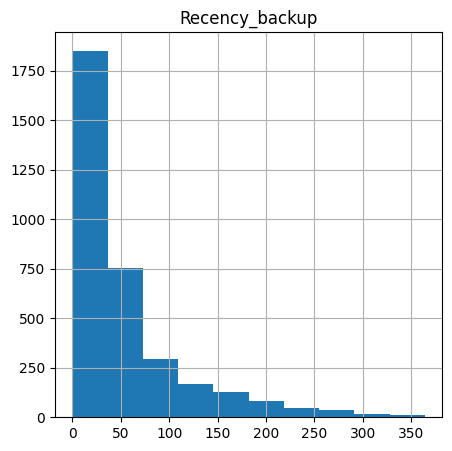

In [ ]:
data_segment0.hist(["Recency_backup"], figsize=(5,5))

Recency ของ Segment0 ข้อมูลมีลักษณะเบ้ขวา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0 ถึง 50 โดยลูกค้าใน Segment0 จะเป็นลูกค้าที่พึ่งกลับมาซื้อของไม่นาน และยังมีลูกค้าที่มี Recency = 0 นั่นหมายความว่า มีลูกค้าที่เป็นลูกค้าใหม่อยู่จำนวนหนึ่ง


array([[<Axes: title={'center': 'Frequency_backup'}>]], dtype=object)

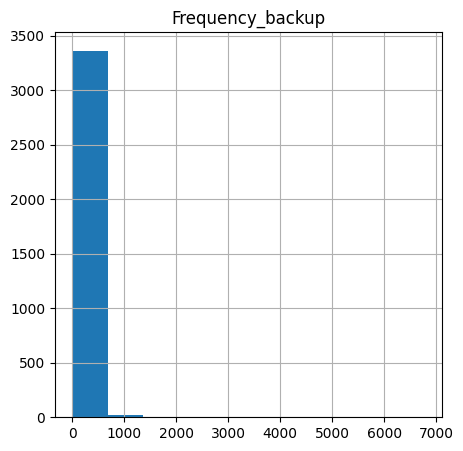

In [ ]:
data_segment0.hist(["Frequency_backup"], figsize=(5,5))

Frequency ของ Segment0 ข้อมูลมีลักษณะเบ้ขวาา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0 ถึง 700 นั่นคือ ลูกค้า Segment0 ส่วนใหญ่จะกลับมาซื้อภายใน 1 ปีน้อยกว่า 700 ครั้ง

array([[<Axes: title={'center': 'totalPrice_backup'}>]], dtype=object)

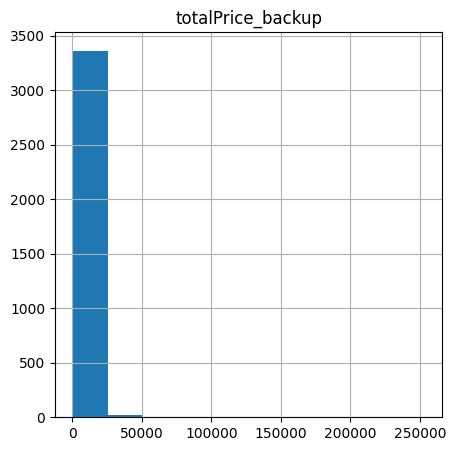

In [ ]:
data_segment0.hist(["totalPrice_backup"], figsize=(5,5))

totalPrice ของ Segment0 ข้อมูลมีลักษณะเบ้ขวา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0 ถึง 25,000 นั่นคือ ลูกค้า Segment0 ส่วนมากมียอดใช้จ่ายน้อยกว่า 25,000 USD ภายใน 1 ปี

<Axes: >

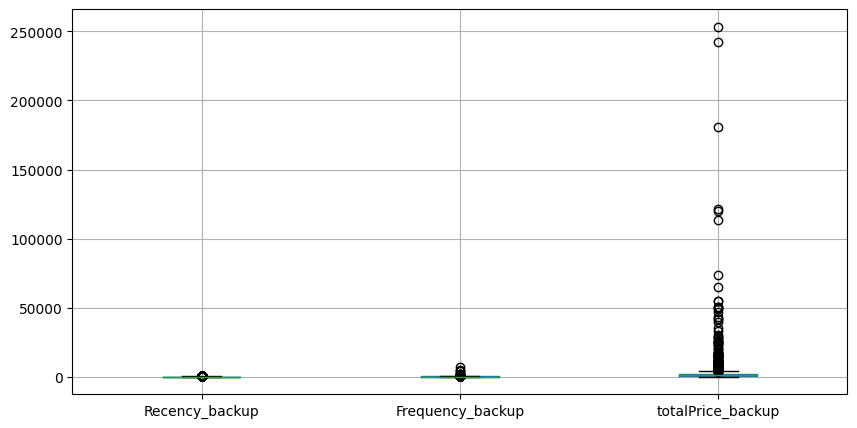

In [ ]:
data_segment0.boxplot(["Recency_backup",	"Frequency_backup",	"totalPrice_backup"], figsize=(10,5))

เมื่อทำการวิเคราะห์ย้อนกลับมายังค่าก่อนการทำ Preprocessing พบว่า Recency_backup และ Frequency_backup มีบางส่วนที่ซ้อนทับกัน ส่วน totalPrice_backup จะมีการกระจายตัวของข้อมูลมากกว่า Recency และ Frequency

<Axes: >

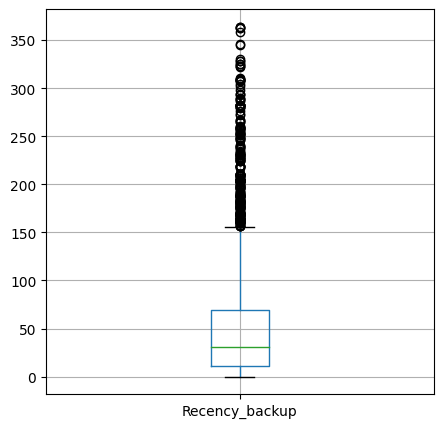

In [ ]:
data_segment0.boxplot(["Recency_backup"], figsize=(5,5))

จาก Boxplot พบว่า ข้อมูล Recency_backup มี median อยู่ที่ประมาณ 40 มีค่า max อยู่ที่ประมาณ 160 และมีค่า min อยู่ที่ประมาณ 0

<Axes: >

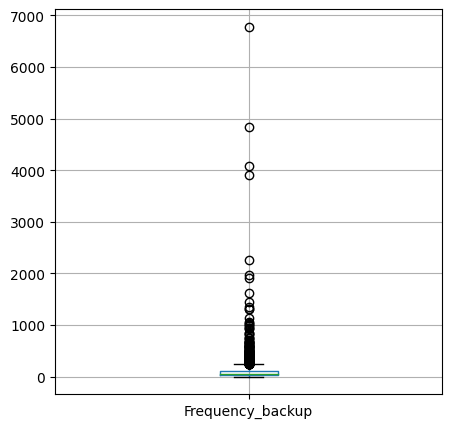

In [ ]:
data_segment0.boxplot(["Frequency_backup"], figsize=(5,5))

จาก Boxplot พบว่า ข้อมูล Frequency_backup มีการกระจุกตัวอยู๋ที่น้อยกว่า 500 ครั้งภายในระยะเวลา 1 ปี

<Axes: >

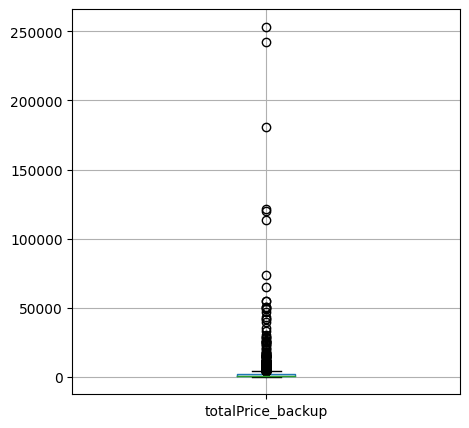

In [ ]:
data_segment0.boxplot(["totalPrice_backup"], figsize=(5,5))

จาก Boxplot พบว่า ข้อมูล totalPrice_backup มีการกระจุกตัวอยู่ที่น้อยกว่า 10,000 USD

In [ ]:
customerID_data_segment0 = data_segment0
data_segment0.to_csv("customerID_data_segment0.csv", index=False)

### พิจารณากำลังซื้อของลูกค้า Segment0

โดยคิดจากจำนวนเงินสั่งซื้อแต่ละตะกร้าของลูกค้าแต่ละคน

จาก RFM Analysis
- R(Recency) : How recently a customer has engaged with the businesss?
- F(Frequency) : How often a customer interacts with the business?
- M(Monetory) : How much did customers spend in total with the business?

สามารถคิดจำนวนเงินสั่งซื้อแต่ละตะกร้า โดยคิดได้จาก UnitPrice*Quantity

In [ ]:
clean_df['PricePerBasket'] = clean_df['UnitPrice'] * clean_df['Quantity']
perBasket = clean_df.groupby('InvoiceNo').PricePerBasket.sum().reset_index()
perBasket

InvoiceNo  PricePerBasket
0         536365           61.14
1         536366           22.20
2         536367          278.73
3         536368           70.05
4         536369           17.85
...          ...             ...
17561     580133          436.61
17562     580134          308.06
17563     580135          126.04
17564     580136          576.44
17565     580137          469.85

[17566 rows x 2 columns]

In [ ]:
unique_invoices = clean_df[['CustomerID', 'InvoiceNo']].drop_duplicates(subset='InvoiceNo')
unique_invoices = unique_invoices.reset_index(drop = True, inplace= False)
unique_invoices

CustomerID  InvoiceNo
0         17850.0     536365
1         17850.0     536366
2         13047.0     536367
3         13047.0     536368
4         13047.0     536369
...           ...        ...
17561     15531.0     580133
17562     13102.0     580134
17563     14702.0     580135
17564     17841.0     580136
17565     17566.0     580137

[17566 rows x 2 columns]

In [ ]:
merged = pd.merge(unique_invoices, perBasket, on="InvoiceNo")
merged

CustomerID  InvoiceNo  PricePerBasket
0         17850.0     536365           61.14
1         17850.0     536366           22.20
2         13047.0     536367          278.73
3         13047.0     536368           70.05
4         13047.0     536369           17.85
...           ...        ...             ...
17561     15531.0     580133          436.61
17562     13102.0     580134          308.06
17563     14702.0     580135          126.04
17564     17841.0     580136          576.44
17565     17566.0     580137          469.85

[17566 rows x 3 columns]

In [ ]:
data_segment0 = pd.merge(merged, data_segment0, on="CustomerID")
data_segment0

CustomerID  InvoiceNo  PricePerBasket   Recency  Frequency  totalPrice  \
0         17850.0     536365           61.14  0.098028   0.057093    0.993545   
1         17850.0     536366           22.20  0.098028   0.057093    0.993545   
2         17850.0     536372           22.20  0.098028   0.057093    0.993545   
3         17850.0     536373          166.58  0.098028   0.057093    0.993545   
4         17850.0     536375          166.58  0.098028   0.057093    0.993545   
...           ...        ...             ...       ...        ...         ...   
16471     15060.0     580069           16.61  0.000000   0.339724    0.940525   
16472     17911.0     579754          314.24  0.003165   0.104440    0.994526   
16473     14804.0     579990          274.97  0.000000   0.032713    0.999465   
16474     15904.0     580094          164.68  0.000000   0.179222    0.983809   
16475     16789.0     580102           80.80  0.000000   0.061763    0.998091   

       Segment  Recency_backup  Frequency_backup  totalPrice_backup  
0            0             364               212            3689.25  
1            0             364               212            3689.25  
2            0             364               212            3689.25  
3            0             364               212            3689.25  
4            0             364               212            3689.25  
...        ...             ...               ...                ...  
16471        0               0               100             276.85  
16472        0               1                33             314.24  
16473        0               0                 9             274.97  
16474        0               0                30             164.68  
16475        0               0                 5              80.80  

[16476 rows x 10 columns]

array([[<Axes: title={'center': 'PricePerBasket'}>]], dtype=object)

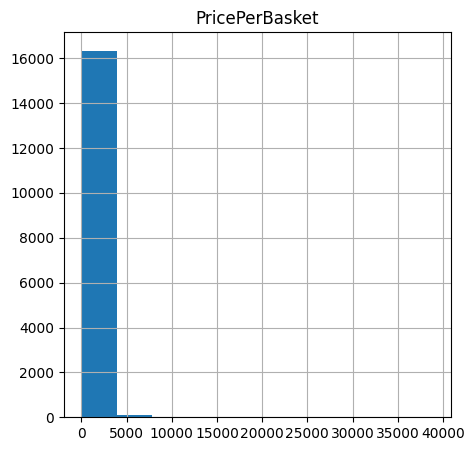

In [ ]:
data_segment0.hist(["PricePerBasket"], figsize=(5,5))

ข้อมูล PricePerBasket ของ segment0 มีลักษณะเบ้ขวา โดยข้อมูลมีการกระจุกตัวอยู่ในช่วง 1 ถึง 2,700

<Axes: >

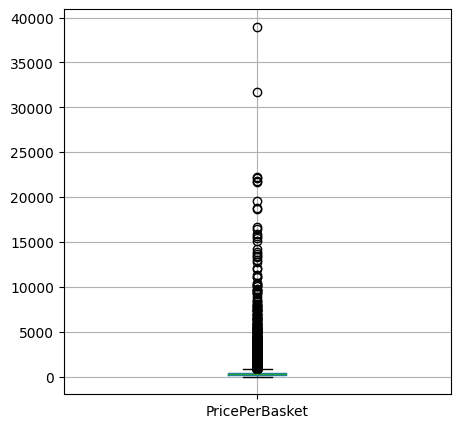

In [ ]:
data_segment0.boxplot(["PricePerBasket"], figsize=(5,5))

จาก Boxplot พบว่า ข้อมูล PricePerBasket ของ Segment0 มีการกระจุกตัวอยู่ที่น้อยกว่า 1,500 USD

In [ ]:
data_segment0['PricePerBasket'].describe()

count    16476.000000
mean       443.877504
std        962.424393
min          0.550000
25%        151.607500
50%        283.465000
75%        448.595000
max      38970.000000
Name: PricePerBasket, dtype: float64

พบว่า ลูกค้าใน Segment0 มีกำลังซื้อต่อครั้งอยู่ในช่วง 0.55 ถึง 38.970 USD หรือมีกำลังซื้อเฉลี่ยต่อครั้ง 443 USD

In [ ]:
data_segment0.to_csv("data_segment0.csv", index=False)

### พิจารณาพฤติกรรมการซื้อในแต่ละเดือนของลูกค้า Segment0

In [ ]:
clean_df

InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
348970 2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971 2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972 2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973 2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974 2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  Recency  totalPrice  month     time  
0                    0           20.34      364       20.34     12  Morning  
1                    0           15.30      364       15.30     12  Morning  
2                    0           25.50      364       25.50     12  Morning  
3                    0           11.10      364       11.10     12  Morning  
4                    0           11.10      364       11.10     12  Morning  
...                ...             ...      ...         ...    ...      ...  
348970               0            2.55        0        2.55     12  Evening  
348971               0            1.65        0        1.65     12  Evening  
348972               0            3.75        0        3.75     12  Evening  
348973               0           25.00        0       25.00     12  Evening  
348974               0            2.85        0        2.85     12  Evening  

[348975 rows x 14 columns]

เรียกดูแค่เดือนของแต่ละข้อมูล

In [ ]:
clean_df.InvoiceDate = pd.to_datetime(clean_df.InvoiceDate)
clean_df['month'] = clean_df['InvoiceDate'].dt.month
clean_df

InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
348970 2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971 2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972 2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973 2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974 2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  month  
0                    0           20.34     12  
1                    0           15.30     12  
2                    0           25.50     12  
3                    0           11.10     12  
4                    0           11.10     12  
...                ...             ...    ...  
348970               0            2.55     12  
348971               0            1.65     12  
348972               0            3.75     12  
348973               0           25.00     12  
348974               0            2.85     12  

[348975 rows x 11 columns]

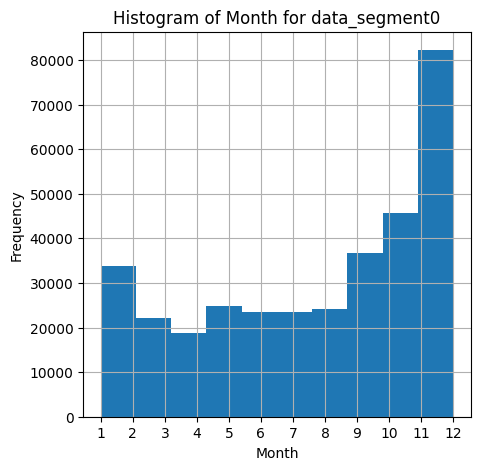

In [ ]:
import matplotlib.pyplot as plt

data_segment0 = clean_df[clean_df['CustomerID'].isin(data_segment0['CustomerID'])]

plt.figure(figsize=(5, 5))
data_segment0['month'].hist()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month for data_segment0')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()


จาก Histrogram พบว่า มีการซื้อมากในในเดิอนพฤศจิกายนและธันวาคมเยอะ ซึ่งอาจเป็นผลมาจากคนมักจะใช้จ่ายเพื่อซื้อของขวัญในช่วงเทศกาลคริสมาส, ปีใหม่ และเทศกาล Black Friday ในวันที่ (24/11/2023) มีการซื้อของขวัญปีใหม่จำนวนมาก ส่วนในช่วงเดือนอื่นๆ อาจไม่มีการซื้อมากเท่าเดือนพฤศจิกายนและธันวาคม เนื่องจากไม่มีโปรโมชันมากนัก

### พิจารณาพฤติกรรมการซื้อในแต่ละช่วงเวลาของลูกค้า Segment0

In [ ]:
clean_df['time'] = clean_df['InvoiceDate'].dt.hour
clean_df

InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
348970 2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971 2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972 2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973 2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974 2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  month  time  
0                    0           20.34     12     8  
1                    0           15.30     12     8  
2                    0           25.50     12     8  
3                    0           11.10     12     8  
4                    0           11.10     12     8  
...                ...             ...    ...   ...  
348970               0            2.55     12    19  
348971               0            1.65     12    19  
348972               0            3.75     12    19  
348973               0           25.00     12    19  
348974               0            2.85     12    19  

[348975 rows x 12 columns]

หาเวลาร้านเปิด

In [ ]:
clean_df['time'].min()

datetime.time(6, 20)

หาเวลาร้านปิด

In [ ]:
clean_df['time'].max()

datetime.time(20, 18)

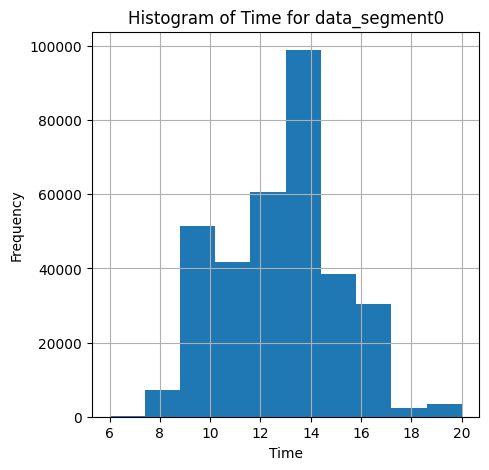

In [ ]:
import matplotlib.pyplot as plt

data_segment0 = clean_df[clean_df['CustomerID'].isin(data_segment0['CustomerID'])]

plt.figure(figsize=(5, 5))
data_segment0['time'].hist()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Time for data_segment0')

plt.show()

พบว่าลูกค้า Segment0 จะนิยมซื้อสินค้าในช่วง 13:00 - 14:00 รองลงมาคือช้วง 11:00 - 13:00 และ 9:00 - 10:00

### พิจารณาข้อมูลทั่วไปลูกค้า Segment1

In [ ]:
data_segment1 = pd.merge(Segment1, customer_df_backup, on= "CustomerID")
data_segment1

Recency  Frequency  totalPrice  CustomerID  Segment  Recency_backup  \
0    0.597557   0.021283    0.801544     18074.0        1             365   
1    0.544056   0.051610    0.837460     16250.0        1             253   
2    0.977033   0.002677    0.213073     13747.0        1             365   
3    0.899201   0.002464    0.437529     12791.0        1             365   
4    0.907407   0.116844    0.403684     17908.0        1             365   
..        ...        ...         ...         ...      ...             ...   
877  0.688638   0.282518    0.667803     17836.0        1              39   
878  0.489061   0.203775    0.848113     15516.0        1              36   
879  0.567327   0.037822    0.822624     15423.0        1              30   
880  0.576251   0.046100    0.815972     17831.0        1              25   
881  0.626249   0.044732    0.778338     12445.0        1              14   

     Frequency_backup  totalPrice_backup  
0                  13             489.60  
1                  24             389.44  
2                   1              79.60  
3                   1             177.60  
4                  47             162.38  
..                ...                ...  
877                16              37.82  
878                15              62.43  
879                 2              43.50  
880                 2              35.40  
881                 1              17.40  

[882 rows x 8 columns]

In [ ]:
data_segment1.describe()

Recency   Frequency  totalPrice    CustomerID  Segment  \
count  882.000000  882.000000  882.000000    882.000000    882.0   
mean     0.750608    0.050445    0.602345  15402.142857      1.0   
std      0.156486    0.047022    0.211200   1756.932097      0.0   
min      0.466110    0.001449    0.014718  12350.000000      1.0   
25%      0.616042    0.022626    0.436706  13860.000000      1.0   
50%      0.753548    0.039033    0.651348  15410.000000      1.0   
75%      0.899034    0.056497    0.783586  16955.750000      1.0   
max      0.999840    0.334462    0.881808  18282.000000      1.0   

       Recency_backup  Frequency_backup  totalPrice_backup  
count      882.000000        882.000000         882.000000  
mean       233.063492         15.399093         194.670896  
std         84.607691         14.657479         113.961527  
min         14.000000          1.000000           2.900000  
25%        175.250000          6.000000         107.022500  
50%        240.500000         11.000000         171.225000  
75%        300.000000         20.000000         271.712500  
max        365.000000        114.000000         590.000000

เมื่อทำการ match ข้อมูลกลับไปยังข้อมูลที่ไม่ผ่านการ Preprocessing(ตัวแปรที่ลงท้ายด้วย backup) พบว่า ลูกค้าที่อยู่ในกลุ่ม Segment1 พฤติกรรมดังนี้
- Segment1 จะมีค่า Recency ในช่วง 14 ถึง 365 วัน(เฉลี่ย 233 วัน) นั่นคือ ลูกค้าในกลุ่ม Segment1 ซื้อสินค้าครั้งล่าสุดตั้งแต่ 14 ถึง 365 วัน และโดยเฉลี่ยจะซื้อครั้งล่าสุด คือ 233 วัน
- Segment1 จะมีค่า Frequency ในช่วง 1 ถึง 114 ครั้ง(เฉลี่ย 15 ครั้ง) นั่นคือ ลูกค้าในกลุ่ม Segment1 นั่นคือ ลูกค้ากลับมาซื้อสินค้าที่ธุรกิจนี้ภายใน 1 ปี ตั้งแต่ 1 ถึง 114 ครั้ง และโดยเฉลี่ยจะซื้อสินค้าที่ธุรกิจนี้ภายใน 1 ปี 15 ครั้ง
- Segment1 จะมีค่า totalPrice ในช่วง 2 ถึง 590 USD(เฉลี่ย 194 USD) นั่นคือ ลูกค้าในกลุ่ม Segment1 นั่นคือ ลูกค้าใช้จ่ายไปกับธุรกิจนี้ตั้งแต่ 2 ถึง 590 USD และโดยเฉลี่ยจะใช้จ่ายกับธุรกิจนี้ 194 USD

array([[<Axes: title={'center': 'Recency_backup'}>]], dtype=object)

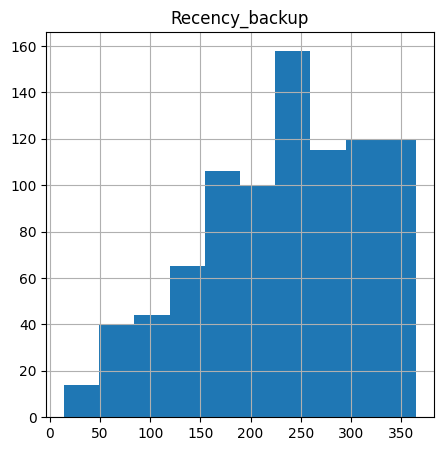

In [ ]:
data_segment1.hist(["Recency_backup"], figsize=(5,5))

Recency ของ Segment1 ข้อมูลมีลักษณะเบ้ซ้าย พบว่า ข้อมูลกระจุกตัวอยู่ที่น้อยกว่า 50 วัน ซึ่งลูกค้า Segment1 จะมาซื้อสินค้าครั้งล่าสุดเมื่อ 10 วันขึ้นไป โดยส่วนใหญ่จะมาซื้อล่าสุดในช่วง 220 ถึง 260 วัน

array([[<Axes: title={'center': 'Frequency_backup'}>]], dtype=object)

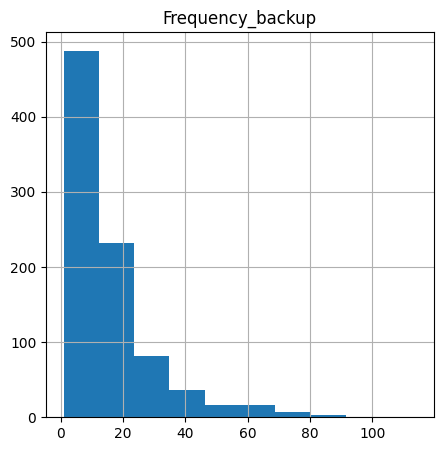

In [ ]:
data_segment1.hist(["Frequency_backup"], figsize=(5,5))

Frequency ของ Segment1 ข้อมูลมีลักษณะเบ้ขวา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 0 ถึง 20

array([[<Axes: title={'center': 'totalPrice_backup'}>]], dtype=object)

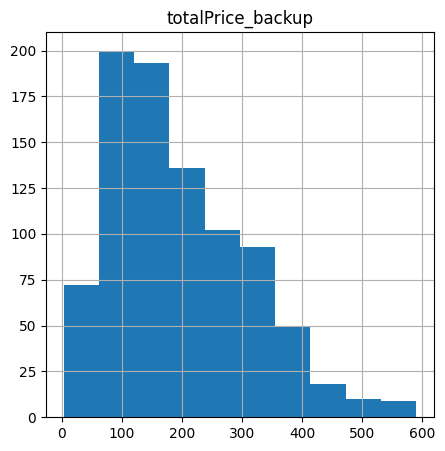

In [ ]:
data_segment1.hist(["totalPrice_backup"], figsize=(5,5))

totalPrice ของ Segment1 ข้อมูลมีลักษณะเบ้ขวา พบว่า ข้อมูลกระจุกตัวอยู่ที่ 50 ถึง 170 นั่นคือ ลูกค้า Segment1 ส่วนใหญ่มียอดใช้จ่าย 50 ถึง 170 USD ภายใน 1 ปี

<Axes: >

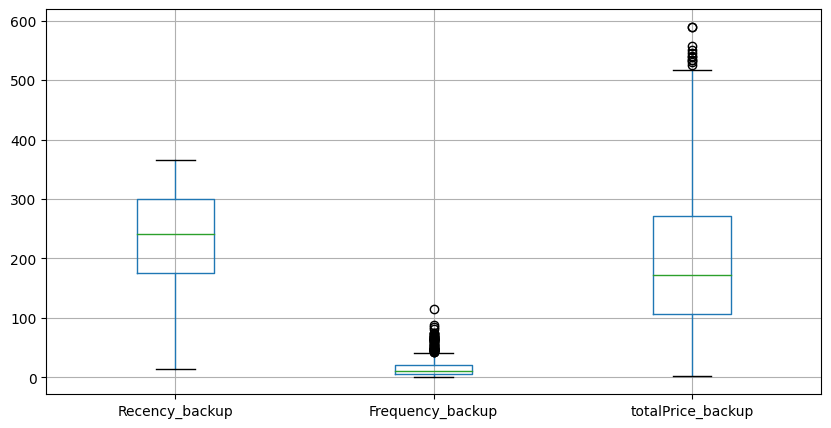

In [ ]:
data_segment1.boxplot(["Recency_backup",	"Frequency_backup",	"totalPrice_backup"], figsize=(10,5))

จาก Boxplot พบว่า Recency_backup และ totalPrice_backup มีความคลุมเคลือกันค่อนข้างมาก ส่วน Frequency_backup ค่าจะมีการกระจุกตัวอยู่ที่เข้าใกล้ 0

<Axes: >

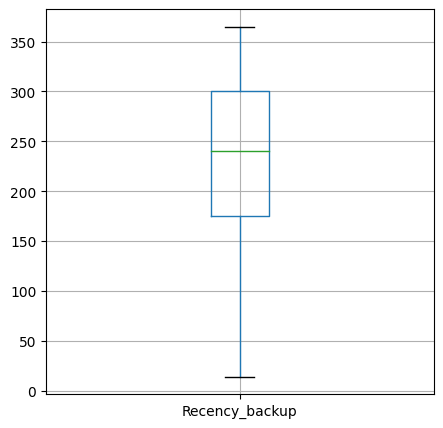

In [ ]:
data_segment1.boxplot(["Recency_backup"], figsize=(5,5))

จาก Boxplot พบว่า Recency_backup ของ Segment0 มีค่า median คือ 240 ค่า max คือ 370 และค่า min คือ 20

<Axes: >

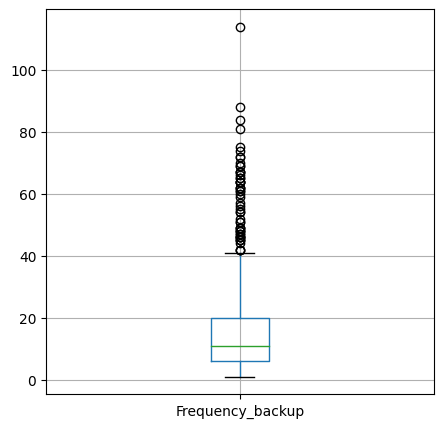

In [ ]:
data_segment1.boxplot(["Frequency_backup"], figsize=(5,5))

จาก Boxplot พบว่า Recency_backup ข้อมูลจะมีค่า median อยู่ที่ 10

<Axes: >

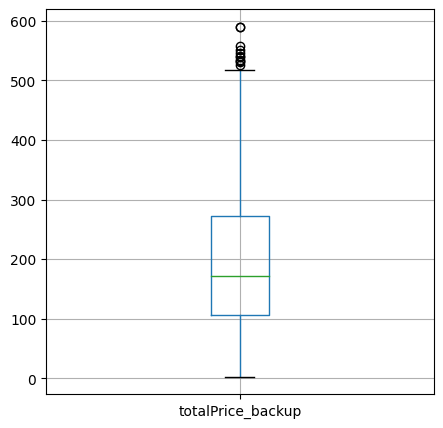

In [ ]:
data_segment1.boxplot(["totalPrice_backup"], figsize=(5,5))

จาก Boxplot พบว่า totalPrice_backiup ข้อมูลจะมีค่า median อยุ่ที่ 170

In [ ]:
customerID_data_segment1 = data_segment1
data_segment1.to_csv("customerID_data_segment1.csv", index=False)

### พิจารณากำลังซื้อของลูกค้า Segment1

โดยคิดจากจำนวนเงินสั่งซื้อแต่ละตะกร้าของลูกค้าแต่ละคน

จาก RFM Analysis
- R(Recency) : How recently a customer has engaged with the businesss?
- F(Frequency) : How often a customer interacts with the business?
- M(Monetory) : How much did customers spend in total with the business?

สามารถคิดจำนวนเงินสั่งซื้อแต่ละตะกร้า โดยคิดได้จาก UnitPrice*Quantity

In [ ]:
data_segment1 = pd.merge(merged, data_segment1, on="CustomerID")
data_segment1

CustomerID  InvoiceNo  PricePerBasket   Recency  Frequency  totalPrice  \
0        18074.0     536384          489.60  0.597557   0.021283    0.801544   
1        16250.0     536388          226.14  0.544056   0.051610    0.837460   
2        16250.0     547535          163.30  0.544056   0.051610    0.837460   
3        13747.0     536393           79.60  0.977033   0.002677    0.213073   
4        12791.0     536403          177.60  0.899201   0.002464    0.437529   
...          ...        ...             ...       ...        ...         ...   
1085     15516.0     572351            6.36  0.489061   0.203775    0.848113   
1086     15516.0     572792            8.67  0.489061   0.203775    0.848113   
1087     15423.0     573895           43.50  0.567327   0.037822    0.822624   
1088     17831.0     574731           35.40  0.576251   0.046100    0.815972   
1089     12445.0     577125           17.40  0.626249   0.044732    0.778338   

      Segment  Recency_backup  Frequency_backup  totalPrice_backup  
0           1             365                13             489.60  
1           1             253                24             389.44  
2           1             253                24             389.44  
3           1             365                 1              79.60  
4           1             365                 1             177.60  
...       ...             ...               ...                ...  
1085        1              36                15              62.43  
1086        1              36                15              62.43  
1087        1              30                 2              43.50  
1088        1              25                 2              35.40  
1089        1              14                 1              17.40  

[1090 rows x 10 columns]

array([[<Axes: title={'center': 'PricePerBasket'}>]], dtype=object)

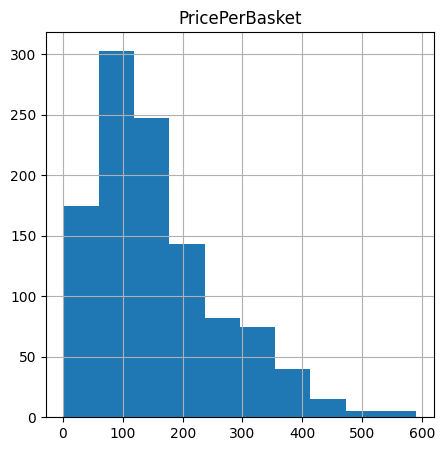

In [ ]:
data_segment1.hist(["PricePerBasket"], figsize=(5,5))

ข้อมูล PricePerBasket เป็นข้อมูลเบ้ขวา ข้อมูลจะกระจุกตัวในช่วงน้อยกว่า 200 นั่นคือ ลูกค้า Segment1 จะมีแนวโน้มซื้อของต่อการซื้อ น้อยกว่า 200 USD ต่อคำสั่งซื้อ

<Axes: >

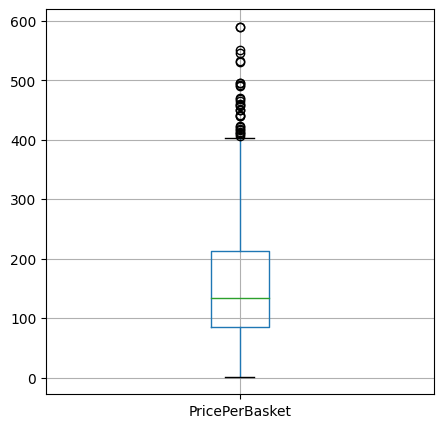

In [ ]:
data_segment1.boxplot(["PricePerBasket"], figsize=(5,5))

ข้อมูล PricePerBasket ข้อมูลมีค่า median อยู่ที่ 140

In [ ]:
data_segment1['PricePerBasket'].describe()

count    1090.000000
mean      157.522688
std       106.051302
min         1.250000
25%        84.585000
50%       134.525000
75%       212.842500
max       590.000000
Name: PricePerBasket, dtype: float64

พบว่า ลูกค้าใน Segment1 มีกำลังซื้อต่อครั้งอยู่ในช่วง 1.25 ถึง 590 USD หรือมีกำลังซื้อเฉลี่ยต่อครั้ง 157 USD

### พิจารณาพฤติกรรมการซื้อในแต่ละเดือนของลูกค้า Segment1

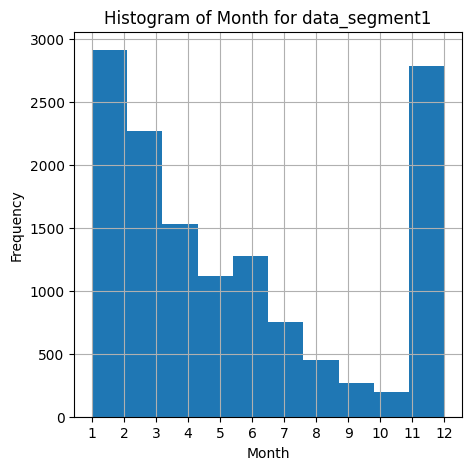

In [ ]:
import matplotlib.pyplot as plt

data_segment1 = clean_df[clean_df['CustomerID'].isin(data_segment1['CustomerID'])]

plt.figure(figsize=(5, 5))
data_segment1['month'].hist()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month for data_segment1')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

จาก Histrogrram พบว่า ในช่วงปลายปีและต้นปี จะมีการใช้จ่ายในร้านนี้มากกว่าเดือนอื่น และมีการใช้จ่ายรองลงมาในช่วงเดือนกุมภาพันธ์ นั่นอาจเป็นผลมาจากช่วงปลายปีมักจะมีโปรโมชันลดราคา และคนมักจะใช้จ่ายเพื่อซื้อของขวัญในช่วงเทศกาลคริสมาส, วาเลนไทน์ และ ปีใหม่

### พิจารณาพฤติกรรมการซื้อในแต่ละช่วงเวลาของลูกค้า Segment1

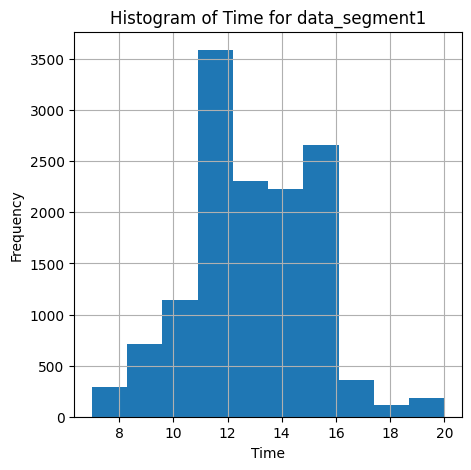

In [ ]:
import matplotlib.pyplot as plt

data_segment1 = clean_df[clean_df['CustomerID'].isin(data_segment1['CustomerID'])]

plt.figure(figsize=(5, 5))
data_segment1['time'].hist()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Time for data_segment1')

plt.show()

พบว่าลูกค้า Segment1 จะนิยมซื้อสินค้าในช่วง 11:00 - 12:00 รองลงมาคือช้วง 12:00 - 16:00

### Summary

รวมข้อมูลของลูกค้า Segment0 และ Segment1

In [ ]:
data_segment0['Segment'] = 0
data_segment0

<ipython-input-20-4bab8a81a9ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_segment0['Segment'] = 0


InvoiceNo  StockCode                          Description  Quantity  \
0          536365      71053                  WHITE METAL LANTERN         6   
1          536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633               HAND WARMER UNION JACK         6   
4          536366      22632            HAND WARMER RED POLKA DOT         6   
...           ...        ...                                  ...       ...   
348970     580137      84347  ROTATING SILVER ANGELS T-LIGHT HLDR         1   
348971     580137      23272    TREE T-LIGHT HOLDER WILLIE WINKIE         1   
348972     580137      23490     T-LIGHT HOLDER HANGING LOVE BIRD         1   
348973     580137      23553          LANDMARK FRAME CAMDEN TOWN          2   
348974     580137      21034         REX CASH+CARRY JUMBO SHOPPER         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
348970 2011-12-01 19:54:00       2.55     17566.0  United Kingdom   
348971 2011-12-01 19:54:00       1.65     17566.0  United Kingdom   
348972 2011-12-01 19:54:00       3.75     17566.0  United Kingdom   
348973 2011-12-01 19:54:00      12.50     17566.0  United Kingdom   
348974 2011-12-01 19:54:00       0.95     17566.0  United Kingdom   

        order_canceled  PricePerBasket  month  time  Segment  
0                    0           20.34     12     8        0  
1                    0           15.30     12     8        0  
2                    0           25.50     12     8        0  
3                    0           11.10     12     8        0  
4                    0           11.10     12     8        0  
...                ...             ...    ...   ...      ...  
348970               0            2.55     12    19        0  
348971               0            1.65     12    19        0  
348972               0            3.75     12    19        0  
348973               0           25.00     12    19        0  
348974               0            2.85     12    19        0  

[335393 rows x 13 columns]

In [ ]:
data_segment1['Segment'] = 1
data_segment1

<ipython-input-21-233d4e5a2828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_segment1['Segment'] = 1


InvoiceNo  StockCode                          Description  Quantity  \
127        536384      82484    WOOD BLACK BOARD ANT WHITE FINISH         3   
128        536384      84755  COLOUR GLASS T-LIGHT HOLDER HANGING        48   
129        536384      22464          HANGING METAL HEART LANTERN        12   
130        536384      21324         HANGING MEDINA LANTERN SMALL         6   
131        536384      22457      NATURAL SLATE HEART CHALKBOARD         12   
...           ...        ...                                  ...       ...   
290624     574161      23582         VINTAGE DOILY JUMBO BAG RED          2   
290625     574161      23203             JUMBO BAG VINTAGE DOILY          1   
297060     574731      22698       PINK REGENCY TEACUP AND SAUCER         6   
297061     574731      22697      GREEN REGENCY TEACUP AND SAUCER         6   
320904     577125      23497         CLASSIC CHROME BICYCLE BELL         12   

               InvoiceDate  UnitPrice  CustomerID         Country  \
127    2010-12-01 09:53:00       6.45     18074.0  United Kingdom   
128    2010-12-01 09:53:00       0.65     18074.0  United Kingdom   
129    2010-12-01 09:53:00       1.65     18074.0  United Kingdom   
130    2010-12-01 09:53:00       2.95     18074.0  United Kingdom   
131    2010-12-01 09:53:00       2.95     18074.0  United Kingdom   
...                    ...        ...         ...             ...   
290624 2011-11-03 11:34:00       2.08     17816.0  United Kingdom   
290625 2011-11-03 11:34:00       2.08     17816.0  United Kingdom   
297060 2011-11-06 15:09:00       2.95     17831.0  United Kingdom   
297061 2011-11-06 15:09:00       2.95     17831.0  United Kingdom   
320904 2011-11-17 18:43:00       1.45     12445.0           Spain   

        order_canceled  PricePerBasket  month  time  Segment  
127                  0           19.35     12     9        1  
128                  0           31.20     12     9        1  
129                  0           19.80     12     9        1  
130                  0           17.70     12     9        1  
131                  0           35.40     12     9        1  
...                ...             ...    ...   ...      ...  
290624               0            4.16     11    11        1  
290625               0            2.08     11    11        1  
297060               0           17.70     11    15        1  
297061               0           17.70     11    15        1  
320904               0           17.40     11    18        1  

[13582 rows x 13 columns]

In [ ]:
frames = [data_segment0, data_segment1]
result = pd.concat(frames)
result

InvoiceNo  StockCode                        Description  Quantity  \
0          536365      71053                WHITE METAL LANTERN         6   
1          536365      22752       SET 7 BABUSHKA NESTING BOXES         2   
2          536365      21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
3          536366      22633             HAND WARMER UNION JACK         6   
4          536366      22632          HAND WARMER RED POLKA DOT         6   
...           ...        ...                                ...       ...   
290624     574161      23582       VINTAGE DOILY JUMBO BAG RED          2   
290625     574161      23203           JUMBO BAG VINTAGE DOILY          1   
297060     574731      22698     PINK REGENCY TEACUP AND SAUCER         6   
297061     574731      22697    GREEN REGENCY TEACUP AND SAUCER         6   
320904     577125      23497       CLASSIC CHROME BICYCLE BELL         12   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
2      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
3      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
290624 2011-11-03 11:34:00       2.08     17816.0  United Kingdom   
290625 2011-11-03 11:34:00       2.08     17816.0  United Kingdom   
297060 2011-11-06 15:09:00       2.95     17831.0  United Kingdom   
297061 2011-11-06 15:09:00       2.95     17831.0  United Kingdom   
320904 2011-11-17 18:43:00       1.45     12445.0           Spain   

        order_canceled  PricePerBasket  month  time  Segment  
0                    0           20.34     12     8        0  
1                    0           15.30     12     8        0  
2                    0           25.50     12     8        0  
3                    0           11.10     12     8        0  
4                    0           11.10     12     8        0  
...                ...             ...    ...   ...      ...  
290624               0            4.16     11    11        1  
290625               0            2.08     11    11        1  
297060               0           17.70     11    15        1  
297061               0           17.70     11    15        1  
320904               0           17.40     11    18        1  

[348975 rows x 13 columns]

In [ ]:
result.to_csv("result.csv", index=False)

Plot ดูความสัมพันธ์ของกำลังซื้อของลูกค้า Segment0 และ Segment1

In [ ]:
import plotly.express as px
fig = px.box(result, x="Segment", y="PricePerBasket")
fig.show()

In [ ]:
data_segment0 = data_segment0.rename(columns={"PricePerBasket": "purchasingPower_segment0"})
data_segment1 = data_segment1.rename(columns={"PricePerBasket": "purchasingPower_segment1"})

compare_purchasingPower = pd.DataFrame([data_segment0['purchasingPower_segment0'].describe(), data_segment1['purchasingPower_segment1'].describe()])
compare_purchasingPower

count       mean        std   min   25%   50%  \
purchasingPower_segment0  335393.0  21.805243  97.468749  0.06  4.95  12.5   
purchasingPower_segment1   13582.0  12.641712  17.291074  0.10  3.48   9.9   

                           75%      max  
purchasingPower_segment0  19.8  38970.0  
purchasingPower_segment1  16.5    590.0

จาก boxplot และค่าทางสถิติสามารถวิเคราห์ได้ว่า Segment0 เป็นกลุ่มลูกค้าที่มีกำลังซื้อกระจายตัวกว่า  Segment1 และค่าเฉลี่ยของกำลังซื้อของ Segment0 จะมีค่ามากกว่า Segment1 นั่นคือ ลูกค้า Segment1 อาจมีกำลังซื้อที่สูงกว่า Segment0 เล็กน้อย รวมไปถึงช่วงกำลังซื้อของ Segment0 จะเป็นช่วงกำลังซื้อที่กว้างกว่า Segment1

Plot ดูความสัมพันธ์ของ Recency, Frequency และ totalPrice

In [ ]:
customerID_data_segment0['Segment'] = 0
customerID_data_segment1['Segment'] = 1

In [ ]:
merged_customer = [customerID_data_segment0, customerID_data_segment1]
merged_customer = pd.concat(merged_customer)
merged_customer

Recency  Frequency  totalPrice  CustomerID  Segment  Recency_backup  \
0    0.098028   0.057093    0.993545     17850.0        0             364   
1    0.015333   0.053026    0.998475     13047.0        0              48   
2    0.001648   0.035265    0.999377     12583.0        0              10   
3    0.091325   0.029392    0.995387     13748.0        0              87   
4    0.347835   0.003211    0.937550     15100.0        0             325   
..        ...        ...         ...         ...      ...             ...   
877  0.688638   0.282518    0.667803     17836.0        1              39   
878  0.489061   0.203775    0.848113     15516.0        1              36   
879  0.567327   0.037822    0.822624     15423.0        1              30   
880  0.576251   0.046100    0.815972     17831.0        1              25   
881  0.626249   0.044732    0.778338     12445.0        1              14   

     Frequency_backup  totalPrice_backup  
0                 212            3689.25  
1                 166            3125.79  
2                 214            6064.61  
3                  28             948.25  
4                   3             876.00  
..                ...                ...  
877                16              37.82  
878                15              62.43  
879                 2              43.50  
880                 2              35.40  
881                 1              17.40  

[4275 rows x 8 columns]

In [ ]:
merged_customer.to_csv("merged_customer.csv", index=False)

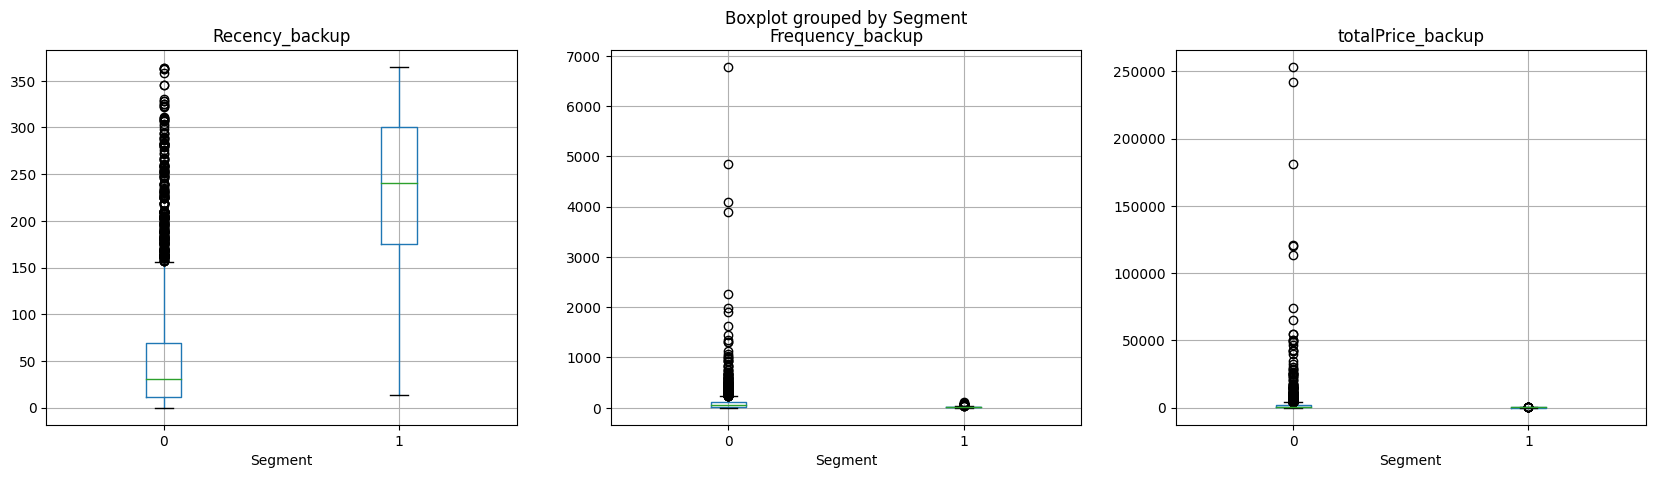

In [ ]:
ContinuousColsList=["Recency_backup", "Frequency_backup", "totalPrice_backup"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(20,5))

for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    merged_customer.boxplot(column=PredictorCol, by='Segment', figsize=(5,5), vert=True, ax=PlotCanvas[i])

จาก Boxplot ของข้อมูลก่อนการทำ Preprocessing(ข้อมูลดิบ) พบว่า

 - พิาจารณา Recency : กลุ่มลูกค้า Segment0 ส่วนใหญ่จะกลุ่มลูกค้าใหม่ ที่พึ่งมาซื้อครั้งล่าสุดไม่นานนัก แต่ก็มีลูกค้าบางส่วนที่เป็นลูกค้าเก่าด้วย ต่างจาก Segment1 ที่เป็นลูกค้าที่มาซื้อครั้งล่าสุดเมื่อนานมาแล้ว
 - พิจารณา Frequency : กลุ่มลูกค้า Segment0 จะมาซื้อของที่ธุรกิจนี้ภายในระยะเวลา 1 ปีบ่อยกว่ากลุ่มลูกค้า Segment1 และในลูกค้าใน Segment0 มาซื้อสินค้าซ้ำๆเยอะมากๆในระยะเวลา 1 ปี
- พิจารณา totalPrice : กลุ่มลูกค้า Segment0 จะมียอดการซื้อสินค้ารวมตลอดระยะเวลา 1 ปี มากกว่ากลุ่มลูกค้า Segment1

In [ ]:
customerID_data_segment0 = customerID_data_segment0.rename(columns={"Recency_backup": "Recency_backup_segment0"})
customerID_data_segment0 = customerID_data_segment0.rename(columns={"Frequency_backup": "Frequency_backup_segment0"})
customerID_data_segment0 = customerID_data_segment0.rename(columns={"totalPrice_backup": "totalPrice_backup_segment0"})

customerID_data_segment1 = customerID_data_segment1.rename(columns={"Recency_backup": "Recency_backup_segment1"})
customerID_data_segment1 = customerID_data_segment1.rename(columns={"Frequency_backup": "Frequency_backup_segment1"})
customerID_data_segment1 = customerID_data_segment1.rename(columns={"totalPrice_backup": "totalPrice_backup_segment1"})

In [ ]:
compare_Recency = pd.DataFrame([customerID_data_segment0['Recency_backup_segment0'].describe(), customerID_data_segment1['Recency_backup_segment1'].describe()])
compare_Recency

count        mean        std   min     25%    50%  \
Recency_backup_segment0  3393.0   53.607427  62.132834   0.0   11.00   31.0   
Recency_backup_segment1   882.0  233.063492  84.607691  14.0  175.25  240.5   

                           75%    max  
Recency_backup_segment0   69.0  364.0  
Recency_backup_segment1  300.0  365.0

จากค่าทางสถิติสามารถวิเคราห์ได้ว่า Segment0 เป็นกลุ่มลูกค้าที่จำนวนวันที่มาซื้อล่าสุดกระจายตัวน้อยกว่า Segment1 และจำนวนวันที่ซื้อล่าสุดของ Segment0 จะมีค่าน้อยกว่า Segment1 นั่นคือ ลูกค้า Segment0 มาซื้อสินค้าครั้งล่าสุดเฉลี่ยเมื่อ 53 วันที่แล้ว (เป็นลูกค้าที่พึ่งเข้ามาซื้อไม่นาน) ส่วนลูกค้า Segment1 มาซื้อสินค้าครั้งล่าสุดเฉลี่ยเมื่อ 233 วันที่แล้ว (เป็นลูกค้าที่ไม่ได้ซื้อมานานแล้ว) โดยในกลุ่มลูกค้า Segment0 มีบางส่วนที่ Recency = 0 คือกลุ่มลูกค้าที่พึ่งมาซื้อเป็นวันแรก หรือลูกค้าที่ซื้อล่าสุดวันสุดท้ายของ Dataset นี้

In [ ]:
compare_Frequency = pd.DataFrame([customerID_data_segment0['Frequency_backup_segment0'].describe(), customerID_data_segment1['Frequency_backup_segment1'].describe()])
compare_Frequency

count       mean         std  min   25%   50%  \
Frequency_backup_segment0  3393.0  98.848512  218.522502  1.0  24.0  51.0   
Frequency_backup_segment1   882.0  15.399093   14.657479  1.0   6.0  11.0   

                             75%     max  
Frequency_backup_segment0  110.0  6783.0  
Frequency_backup_segment1   20.0   114.0

จากค่าทางสถิติสามารถวิเคราห์ได้ว่า Segment0 เป็นกลุ่มลูกค้าที่มีจำนวนครั้งที่มาซื้อของที่ธุรกิจนี้ตลอด 1 ปี กระจายตัวมากกว่า Segment1 และเฉลี่ยจำนวนครั้งที่มาซื้อของที่ธุรกิจนี้ของ Segment0 จะมีค่ามากกว่า Segment1 นั่นคือ ลูกค้า Segment0 จะมีค่าเฉลี่ยจำนวนครั้งที่มาซื้อของที่ธุรกิจนี้ 98 ครั้ง (ลูกค้าประจำ) ส่วนลูกค้า Segment1 มีค่าเฉลี่ยจำนวนครั้งที่มาซื้อของที่ธุรกิจนี้ 15 ครั้ง(ลูกค้าครั้งคราว) และในกลุ่มลูกค้า Segment0 มีกลุ่มลูกค้าที่มาซื้อของบ่อยมากๆ ถึง 6,783 ครั้งใน 1 ปี

In [ ]:
compare_totalPrice = pd.DataFrame([customerID_data_segment0['totalPrice_backup_segment0'].describe(), customerID_data_segment1['totalPrice_backup_segment1'].describe()])
compare_totalPrice

count         mean          std   min       25%  \
totalPrice_backup_segment0  3393.0  2155.415782  8603.924278  30.0  423.8400   
totalPrice_backup_segment1   882.0   194.670896   113.961527   2.9  107.0225   

                                50%        75%        max  
totalPrice_backup_segment0  843.730  1809.1400  253484.14  
totalPrice_backup_segment1  171.225   271.7125     590.00

จากค่าทางสถิติสามารถวิเคราะห์ได้ว่า Segment0 เป็นกลุ่มลูกค้าที่มียอดรวมการซื้อของกับธุรกิจนี้ตลอด 1 ปีมีความกระจายตัวมากกว่า Segment1 และค่าเฉลี่ยของยอดรวมการซื้อของกับธุรกิจนี้ตลอด 1 ปีของ Segment0 จะมีค่า 2,155 USD ส่วนลูกค้า Segment1 จะมีค่าเฉลี่ยของยอดรวมการซื้อของกับธุรกิจนี้ตลอด 1 ปี คือ 194 USD และในกลุ่มลูกค้าของ Segment0 จะลูกค้าคนที่ซื้อสูงสุดอยู่ที่ 253,484 USD ภายใน 1 ปี

#13.Use cases

สามารถสรุปคุณลักษณะของ Cluster ได้คล่าวๆดังนี้
- Segment0 : กลุ่มลูกค้าที่มียอดใช้จ่ายสูง ลูกค้ามาซื้อของที่ธุรกิจนี้บ่อย แต่เป็นกลุ่มลูกค้าใหม่ ที่พึ่งมาซื้อครั้งล่าสุดไม่นานนัก
- Segment1 : กลุ่มลูกค้าที่มียอดใช้จ่ายน้อย ลูกค้ามาซื้อของที่ธุรกิจนี้ไม่บ่อยนัก แต่จะเป็นกลุ่มลูกค้าเก่า กลุ่มที่ครั้งที่มาซื้อล่าสุดนานแล้ว

### พิจารณาสินค้าที่ลูกค้าแต่ละ Segment นิยม

Segment0

In [ ]:
description_counts = pd.DataFrame(data_segment0['Description'].value_counts())
description_counts

Description
REGENCY CAKESTAND 3 TIER                  1597
ASSORTED COLOUR BIRD ORNAMENT             1313
PARTY BUNTING                             1302
LUNCH BAG RED RETROSPOT                   1259
SET OF 3 CAKE TINS PANTRY DESIGN          1098
...                                        ...
BIG POLKADOT MUG                             1
WALL ART,ONLY ONE PERSON                     1
PINK/AMETHYST/GOLD NECKLACE                  1
NEW ENGLAND MUG W GIFT BOX                   1
PEARL AND CHERRY QUARTZ BRACLET              1

[2969 rows x 1 columns]

3 อันดับแรกที่ลูกค้า Segment0 นิยมซื้อคือ (1) REGENCY CAKESTAND 3 TIER (2) ASSORTED COLOUR BIRD ORNAMENT	(3) PARTY BUNTING

Segment1

In [ ]:
description_counts = pd.DataFrame(data_segment1['Description'].value_counts())
description_counts

Description
REGENCY CAKESTAND 3 TIER                  86
REX CASH+CARRY JUMBO SHOPPER              83
PARTY BUNTING                             78
NATURAL SLATE HEART CHALKBOARD            61
HEART OF WICKER SMALL                     61
...                                      ...
CAKE STAND LACE WHITE                      1
IF YOU CAN'T STAND THE HEAT MUG            1
PING! MICROWAVE PLATE                      1
UTILTY CABINET WITH HOOKS                  1
CLASSIC CHROME BICYCLE BELL                1

[2139 rows x 1 columns]

3 อันดับแรกที่ลูกค้า Segment1 นิยมซื้อคือ (1) REGENCY CAKESTAND 3 TIER (2) REX CASH+CARRY JUMBO SHOPPER	(3) PARTY BUNTING

### พิจารณาสินค้าที่ขายดีในแต่ละเดือน

พิจารณา Segment0

In [ ]:
customerID_data_segment0 = pd.read_csv("customerID_data_segment0.csv")

In [ ]:
result_segment0 = result[result['CustomerID'].isin(customerID_data_segment0['CustomerID'])]

Jan = result_segment0[result_segment0['month'] == 1]
Jan = pd.DataFrame(Jan['Description'].value_counts())
Jan

Description
SET OF 3 CAKE TINS PANTRY DESIGN             124
HEART OF WICKER SMALL                        105
REGENCY CAKESTAND 3 TIER                     104
SET OF 3 HEART COOKIE CUTTERS                 89
NATURAL SLATE HEART CHALKBOARD                85
...                                          ...
MAGIC DRAWING SLATE LEAP FROG                  1
VINTAGE GLASS COFFEE CADDY                     1
STAR  T-LIGHT HOLDER                           1
FOLDING UMBRELLA BLACKBLUE POLKADOT            1
MODERN VINTAGE COTTON SHOPPING BAG             1

[1690 rows x 1 columns]

In [ ]:
Feb = result_segment0[result_segment0['month'] == 2]
Feb = pd.DataFrame(Feb['Description'].value_counts())
Feb

Description
SET OF 3 CAKE TINS PANTRY DESIGN           121
REGENCY CAKESTAND 3 TIER                    89
HEART OF WICKER SMALL                       84
SET OF 6 SPICE TINS PANTRY DESIGN           83
HEART OF WICKER LARGE                       75
...                                        ...
12 PINK HEN+CHICKS IN BASKET                 1
RAIN PONCHO                                  1
PINK ROSE FABRIC MIRROR                      1
VINTAGE BEAD PINK EVENING BAG                1
SKULLS SQUARE TISSUE BOX                     1

[1658 rows x 1 columns]

In [ ]:
Mar = result_segment0[result_segment0['month'] == 3]
Mar = pd.DataFrame(Mar['Description'].value_counts())
Mar

Description
REGENCY CAKESTAND 3 TIER                     156
SET OF 3 CAKE TINS PANTRY DESIGN             144
SET OF 4 PANTRY JELLY MOULDS                 123
PARTY BUNTING                                110
SET OF 6 SPICE TINS PANTRY DESIGN            108
...                                          ...
RECTANGULAR SHAPED MIRROR                      1
200 BENDY SKULL STRAWS                         1
WOOD STAMP SET FLOWERS                         1
SILVER PHOTO FRAME                             1
CHUNKY SILVER NECKLACE PASTEL FLOWE            1

[1758 rows x 1 columns]

In [ ]:
Apr = result_segment0[result_segment0['month'] == 4]
Apr = pd.DataFrame(Apr['Description'].value_counts())
Apr

Description
PARTY BUNTING                               145
REGENCY CAKESTAND 3 TIER                    140
PAPER CHAIN KIT EMPIRE                      123
ASSORTED COLOUR BIRD ORNAMENT               102
PACK OF 72 RETROSPOT CAKE CASES              97
...                                         ...
BLUE ROSE FABRIC MIRROR                       1
PINK BUTTERFLY CUSHION COVER                  1
CANDY SPOT CUSHION COVER                      1
MAKE YOUR OWN PLAYTIME CARD KIT               1
ASS DES PHONE SPONGE CRAFT STICKER            1

[1756 rows x 1 columns]

In [ ]:
May = result_segment0[result_segment0['month'] == 5]
May = pd.DataFrame(May['Description'].value_counts())
May

Description
PARTY BUNTING                           204
SPOTTY BUNTING                          203
REGENCY CAKESTAND 3 TIER                162
LUNCH BAG APPLE DESIGN                  149
LUNCH BAG DOILEY PATTERN                145
...                                     ...
PING! MICROWAVE PLATE                     1
CANDY HEART HANGING DECORATION            1
SMALL SILVER FLOWER CANDLE POT            1
VINTAGE KITCHEN PRINT FRUITS              1
ASSORTED TUTTI FRUTTI MIRROR              1

[1826 rows x 1 columns]

In [ ]:
Jun = result_segment0[result_segment0['month'] == 6]
Jun = pd.DataFrame(Jun['Description'].value_counts())
Jun

Description
PARTY BUNTING                               171
SPOTTY BUNTING                              149
JUMBO BAG DOILEY PATTERNS                   134
LUNCH BAG DOILEY PATTERN                    134
LUNCH BAG RED RETROSPOT                     128
...                                         ...
CHRISTMAS CARD SCREEN PRINT                   1
KITCHEN FLOWER POTS WALL PLAQUE               1
CERAMIC STRAWBERRY TRINKET TRAY               1
BAKING MOULD EASTER EGG WHITE CHOC            1
RUSTIC  SEVENTEEN DRAWER SIDEBOARD            1

[1929 rows x 1 columns]

In [ ]:
Jul = result_segment0[result_segment0['month'] == 7]
Jul = pd.DataFrame(Jul['Description'].value_counts())
Jul

Description
PARTY BUNTING                           156
SPOTTY BUNTING                          152
LUNCH BAG DOILEY PATTERN                147
JUMBO BAG DOILEY PATTERNS               130
SET OF 3 REGENCY CAKE TINS              123
...                                     ...
VINTAGE GLASS COFFEE CADDY                1
CANDY SPOT BUNNY                          1
BABY MOUSE RED GINGHAM DRESS              1
MONEY BOX CONFECTIONERY DESIGN            1
MISELTOE HEART WREATH CREAM               1

[1968 rows x 1 columns]

In [ ]:
Aug = result_segment0[result_segment0['month'] == 8]
Aug = pd.DataFrame(Aug['Description'].value_counts())
Aug

Description
SPOTTY BUNTING                         147
LUNCH BAG RED RETROSPOT                137
LUNCH BAG SUKI DESIGN                  125
PARTY BUNTING                          125
REGENCY CAKESTAND 3 TIER               118
...                                    ...
ASSORTED CIRCULAR MOBILE                 1
SMALL POPCORN HOLDER                     1
NURSERY A,B,C PAINTED LETTERS            1
PARTY CONES CANDY ASSORTED               1
LOCAL CAFE MUG                           1

[1993 rows x 1 columns]

In [ ]:
Sep = result_segment0[result_segment0['month'] == 9]
Sep = pd.DataFrame(Sep['Description'].value_counts())
Sep

Description
HOT WATER BOTTLE KEEP CALM                193
JUMBO BAG VINTAGE DOILY                   169
PAPER CHAIN KIT 50'S CHRISTMAS            147
LUNCH BAG RED RETROSPOT                   138
LUNCH BAG VINTAGE DOILY                   138
...                                       ...
CLEAR CRYSTAL STAR PHONE CHARM              1
DECORATIVE PLANT POT WITH FRIEZE            1
SET OF 4 DIAMOND NAPKIN RINGS               1
DOCTOR'S BAG SOFT TOY                       1
VEGETABLE GARDEN CHOPPING BOARD             1

[2150 rows x 1 columns]

In [ ]:
Oct = result_segment0[result_segment0['month'] == 10]
Oct = pd.DataFrame(Oct['Description'].value_counts())
Oct

Description
PAPER CHAIN KIT 50'S CHRISTMAS           205
HOT WATER BOTTLE KEEP CALM               178
REGENCY CAKESTAND 3 TIER                 151
DOORMAT KEEP CALM AND COME IN            148
ASSORTED COLOUR BIRD ORNAMENT            144
...                                      ...
EASTER TIN KEEPSAKE                        1
FELT TOADSTOOL LARGE                       1
MOROCCAN BEATEN METAL DISH                 1
SET/4 COLOURFUL MIXING BOWLS               1
POTTING SHED TEA MUG                       1

[2266 rows x 1 columns]

In [ ]:
Nov = result_segment0[result_segment0['month'] == 11]
Nov = pd.DataFrame(Nov['Description'].value_counts())
Nov

Description
RABBIT NIGHT LIGHT                         466
PAPER CHAIN KIT 50'S CHRISTMAS             359
HOT WATER BOTTLE KEEP CALM                 271
PAPER CHAIN KIT VINTAGE CHRISTMAS          240
JUMBO BAG 50'S CHRISTMAS                   233
...                                        ...
CAKES AND RABBITS DESIGN FLANNEL             1
FLORAL BLUE MONSTER                          1
BOYS ALPHABET IRON ON PATCHES                1
UNION STRIPE CUSHION COVER                   1
RABBIT  DESIGN  COTTON TOTE BAG              1

[2283 rows x 1 columns]

In [ ]:
Dec = result_segment0[result_segment0['month'] == 12]
Dec = pd.DataFrame(Dec['Description'].value_counts())
Dec

Description
REGENCY CAKESTAND 3 TIER                     136
PAPER CHAIN KIT 50'S CHRISTMAS               131
HAND WARMER BABUSHKA DESIGN                  129
SCOTTIE DOG HOT WATER BOTTLE                 125
CHOCOLATE HOT WATER BOTTLE                   117
...                                          ...
SILVER LARIAT BLACK STONE EARRINGS             1
SILVER HOOP EARRINGS WITH FLOWER               1
RED PUDDING SPOON                              1
PINK SPOTS CHOCOLATE NESTING BOXES             1
LANDMARK FRAME CAMDEN TOWN                     1

[2200 rows x 1 columns]

แต่เมื่อลองวิเคราะห์อันดับของ REGENCY CAKESTAND 3 TIER พบว่า ถึงแม้สินค้านี้จะไม่ได้อยู่อันดับที่ 1 ตลอดแต่ยังคงมักจะติดอันดับต้นๆของแต่ละเดือนเสมอ มีการซื้อตลอดทั้งปี จึงเป็นสินค้ายอดนิยมอันดับ 1

สรุปรายชื่อสินค้าที่ควรแนะนำให้กับกลุ่มลูกค้า Segment0 ในแต่ละเดือน

- Jan : SET OF 3 CAKE TINS PANTRY DESIGN
- Feb : SET OF 3 CAKE TINS PANTRY DESIGN
- Mar : REGENCY CAKESTAND 3 TIER
- Apr : PARTY BUNTING
- May : PARTY BUNTING
- Jun : PARTY BUNTING
- July : PARTY BUNTING
- Aug : SPOTTY BUNTING
- Sep : HOT WATER BOTTLE KEEP CALM
- Oct : PAPER CHAIN KIT 50'S CHRISTMAS
- Nov : RABBIT NIGHT LIGHT
- Dec : REGENCY CAKESTAND 3 TIER

พิจารณา Segment1

In [ ]:
customerID_data_segment1 = pd.read_csv("customerID_data_segment1.csv")

In [ ]:
result_segment1 = result[result['CustomerID'].isin(customerID_data_segment1['CustomerID'])]

Jan = result_segment1[result_segment1['month'] == 1]
Jan = pd.DataFrame(Jan['Description'].value_counts())
Jan

Description
HEART OF WICKER SMALL                         15
HEART OF WICKER LARGE                         12
BAKING SET 9 PIECE RETROSPOT                  11
NATURAL SLATE HEART CHALKBOARD                11
ASSORTED COLOUR BIRD ORNAMENT                 10
...                                          ...
BIRD HOUSE HOT WATER BOTTLE                    1
RED RETROSPOT SUGAR JAM BOWL                   1
WATERING CAN PINK BUNNY                        1
ROUND SNACK BOXES SET OF4 WOODLAND             1
VINTAGE CREAM CAT FOOD CONTAINER               1

[743 rows x 1 columns]

In [ ]:
Feb = result_segment1[result_segment1['month'] == 2]
Feb = pd.DataFrame(Feb['Description'].value_counts())
Feb

Description
REGENCY CAKESTAND 3 TIER                   22
PARTY BUNTING                              11
NATURAL SLATE HEART CHALKBOARD             11
ROSES REGENCY TEACUP AND SAUCER            10
GREEN REGENCY TEACUP AND SAUCER            10
...                                       ...
HANGING WOOD AND FELT BUTTERFLY             1
HANGING CHICK GREEN DECORATION              1
HANGING WOOD AND FELT HEART                 1
CARD SUKI BIRTHDAY                          1
SWEETHEART CERAMIC TRINKET BOX              1

[783 rows x 1 columns]

In [ ]:
Mar = result_segment1[result_segment1['month'] == 3]
Mar = pd.DataFrame(Mar['Description'].value_counts())
Mar

Description
PARTY BUNTING                               17
NATURAL SLATE HEART CHALKBOARD              17
PAPER CHAIN KIT EMPIRE                      13
VICTORIAN GLASS HANGING T-LIGHT             13
SET OF 3 CAKE TINS PANTRY DESIGN            12
...                                        ...
BULL DOG BOTTLE TOP WALL CLOCK               1
CLOCK MAGNET MUM'S KITCHEN                   1
PINK GINGHAM CAT WITH SCARF                  1
CLAM SHELL SMALL                             1
COFFEE SCENT PILLAR CANDLE                   1

[1009 rows x 1 columns]

In [ ]:
Apr = result_segment1[result_segment1['month'] == 4]
Apr = pd.DataFrame(Apr['Description'].value_counts())
Apr

Description
PARTY BUNTING                              18
REGENCY CAKESTAND 3 TIER                   17
PAPER CHAIN KIT EMPIRE                     14
HOMEMADE JAM SCENTED CANDLES               10
ENAMEL FLOWER JUG CREAM                    10
...                                       ...
CHILDS BREAKFAST SET DOLLY GIRL             1
PINK BABY BUNTING                           1
MEMO BOARD RETROSPOT  DESIGN                1
TOAST ITS - HAPPY BIRTHDAY                  1
TOOL BOX SOFT TOY                           1

[804 rows x 1 columns]

In [ ]:
May = result_segment1[result_segment1['month'] == 5]
May = pd.DataFrame(May['Description'].value_counts())
May

Description
REGENCY CAKESTAND 3 TIER                    9
REX CASH+CARRY JUMBO SHOPPER                9
SPOTTY BUNTING                              7
ROSES REGENCY TEACUP AND SAUCER             7
CITRONELLA CANDLE FLOWERPOT                 7
...                                       ...
ALARM CLOCK BAKELIKE ORANGE                 1
TRAVEL CARD WALLET RETROSPOT                1
TRAVEL CARD WALLET VINTAGE ROSE             1
TRAVEL CARD WALLET TRANSPORT                1
HOT WATER BOTTLE I AM SO POORLY             1

[649 rows x 1 columns]

In [ ]:
Jun = result_segment1[result_segment1['month'] == 6]
Jun = pd.DataFrame(Jun['Description'].value_counts())
Jun

Description
PARTY BUNTING                                9
HEART DECORATION RUSTIC HANGING              9
ANTIQUE SILVER T-LIGHT GLASS                 7
DOORMAT KEEP CALM AND COME IN                7
REX CASH+CARRY JUMBO SHOPPER                 7
...                                        ...
CLASSIC FRENCH STYLE BASKET BROWN            1
DOORMAT RED RETROSPOT                        1
ALARM CLOCK BAKELIKE ORANGE                  1
SET 3 RETROSPOT TEA,COFFEE,SUGAR             1
BOTANICAL ROSE GREETING CARD                 1

[789 rows x 1 columns]

In [ ]:
Jul = result_segment1[result_segment1['month'] == 7]
Jul = pd.DataFrame(Jul['Description'].value_counts())
Jul

Description
REX CASH+CARRY JUMBO SHOPPER                  10
SET OF 4 PANTRY JELLY MOULDS                   8
GLITTER BUTTERFLY CLIPS                        5
SET OF 60 I LOVE LONDON CAKE CASES             5
HEART OF WICKER SMALL                          5
...                                          ...
MIRROR MOSAIC T-LIGHT HOLDER                   1
SILVER DIAMANTE PEN IN GIFT BOX                1
LILAC DIAMANTE PEN IN GIFT BOX                 1
BIRDHOUSE DECORATION MAGIC GARDEN              1
RED RETROSPOT CAKE STAND                       1

[557 rows x 1 columns]

In [ ]:
Aug = result_segment1[result_segment1['month'] == 8]
Aug = pd.DataFrame(Aug['Description'].value_counts())
Aug

Description
SET OF 12 MINI LOAF BAKING CASES               4
SINGLE ANTIQUE ROSE HOOK IVORY                 4
WHITE WOOD GARDEN PLANT LADDER                 4
HOMEMADE JAM SCENTED CANDLES                   3
REGENCY CAKESTAND 3 TIER                       3
...                                          ...
WOODEN PICTURE FRAME WHITE FINISH              1
PARTY CONE CHRISTMAS DECORATION                1
LARGE ROUND WICKER PLATTER                     1
GLASS CLOCHE SMALL                             1
SILVER GLITTER FLOWER VOTIVE HOLDER            1

[357 rows x 1 columns]

In [ ]:
Sep = result_segment1[result_segment1['month'] == 9]
Sep = pd.DataFrame(Sep['Description'].value_counts())
Sep

Description
PARTY BUNTING                              3
ASSORTED CIRCULAR MOBILE                   3
JAZZ HEARTS PURSE NOTEBOOK                 3
REX CASH+CARRY JUMBO SHOPPER               3
PACK OF 72 RETROSPOT CAKE CASES            2
...                                      ...
PAINTED METAL PEARS ASSORTED               1
ASSORTED COLOUR BIRD ORNAMENT              1
RED RETROSPOT WRAP                         1
JAM MAKING SET PRINTED                     1
HEADS AND TAILS SPORTING FUN               1

[236 rows x 1 columns]

In [ ]:
Oct = result_segment1[result_segment1['month'] == 10]
Oct = pd.DataFrame(Oct['Description'].value_counts())
Oct

Description
REX CASH+CARRY JUMBO SHOPPER                  3
SET OF 4 KNICK KNACK TINS DOILY               3
PINK CREAM FELT CRAFT TRINKET BOX             2
LUNCH BAG VINTAGE DOILY                       2
LUNCH BAG SPACEBOY DESIGN                     2
...                                         ...
TEATIME ROUND PENCIL SHARPENER                1
JAZZ HEARTS PURSE NOTEBOOK                    1
JAZZ HEARTS ADDRESS BOOK                      1
ASSORTED TUTTI FRUTTI PEN                     1
GIANT 50'S CHRISTMAS CRACKER                  1

[171 rows x 1 columns]

In [ ]:
Nov = result_segment1[result_segment1['month'] == 11]
Nov = pd.DataFrame(Nov['Description'].value_counts())
Nov

Description
LIPSTICK PEN FUSCHIA                       1
PACKING CHARGE                             1
VINTAGE DOILY JUMBO BAG RED                1
JUMBO BAG VINTAGE DOILY                    1
PINK REGENCY TEACUP AND SAUCER             1
GREEN REGENCY TEACUP AND SAUCER            1
CLASSIC CHROME BICYCLE BELL                1

In [ ]:
Dec = result_segment1[result_segment1['month'] == 12]
Dec = pd.DataFrame(Dec['Description'].value_counts())
Dec

Description
PAPER CHAIN KIT 50'S CHRISTMAS              25
REX CASH+CARRY JUMBO SHOPPER                20
HEART OF WICKER SMALL                       19
PAPER CHAIN KIT VINTAGE CHRISTMAS           18
HEART OF WICKER LARGE                       17
...                                        ...
FLOOR CUSHION ELEPHANT CARNIVAL              1
TRIANGULAR POUFFE VINTAGE                    1
ELEPHANT CARNIVAL POUFFE                     1
PARTY PIZZA DISH RED RETROSPOT               1
WOODEN CROQUET GARDEN SET                    1

[1092 rows x 1 columns]

สรุปรายชื่อสินค้าที่ควรแนะนำให้กับกลุ่มลูกค้า Segment1 ในแต่ละเดือน
- Jan : HEART OF WICKER SMALL
- Feb : REGENCY CAKESTAND 3 TIER
- Mar : PARTY BUNTING, NATURAL SLATE HEART CHALKBOARD
- Apr : PARTY BUNTING
- May : REGENCY CAKESTAND 3 TIER, REX CASH+CARRY JUMBO SHOPPER
- Jun : PARTY BUNTING, HEART DECORATION RUSTIC HANGING
- Jul : REX CASH+CARRY JUMBO SHOPPER
- Aug : SET OF 12 MINI LOAF BAKING CASES, SINGLE ANTIQUE ROSE HOOK IVORY, WHITE WOOD GARDEN PLANT LADDER
- SEP : PARTY BUNTING, ASSORTED CIRCULAR MOBILE, JAZZ HEARTS PURSE NOTEBOOK, REX CASH+CARRY JUMBO SHOPPER
- Oct : REX CASH+CARRY JUMBO SHOPPER, SET OF 4 KNICK KNACK TINS DOILY
- Nov : ไม่มีสินค้าที่แนะนำเนื่องจากข้อมูลมีการซื้อสินค้าแค่อย่างละชิ้น แนะนำให้ธุรกิจนี้แนะนำเป็นสินค้าที่มีความนิยมสูงสุดอย่าง REGENCY CAKESTAND 3 TIER แทน
- Dec : PAPER CHAIN KIT 50'S CHRISTMAS


จาการพิจารณาพฤติกรรมการซื้อในแต่ละเดือนของแต่ละ Segment พบว่า
- ควรมีการทำโปรโมชันให้กับกลุ่มลูกค้า Segment0 ในช่วงเดือนมีนาคมถึงกันยายน เนื่องจากมียอดขายจาก Segment0 ที่ไม่ดี  โดยอาจแนะนำเป็น 3 สินค้าที่ Segment0 นิยม นั่นคือ REGENCY CAKESTAND 3 TIER,
ASSORTED COLOUR BIRD ORNAMENT และ PARTY BUNTING
- ควรมีการทำโปรโมชันให้กับกลุ่มลูกค้า Segment1 ในช่วงเดือนสิงหาคมถึงพฤศจิกายน เนื่องจากมียอดขายจาก Segment1 ที่ไม่ดี โดยอาจแนะนำเป็น 3 สินค้าที่ Segment1 นิยม นั่นคือ REGENCY CAKESTAND 3 TIER, REX CASH+CARRY JUMBO SHOPPER และ PARTY BUNTING


เมื่ออ้างอิงจากคุณลักษณะของลูกค้าแต่ละ Segment นั่นคือ
- Segment0 : กลุ่มลูกค้าที่มียอดใช้จ่ายสูง ลูกค้ามาซื้อของที่ธุรกิจนี้บ่อย แต่เป็นกลุ่มลูกค้าใหม่ ที่พึ่งมาซื้อครั้งล่าสุดไม่นานนัก
- Segment1 : กลุ่มลูกค้าที่มียอดใช้จ่ายน้อย ลูกค้ามาซื้อของที่ธุรกิจนี้ไม่บ่อยนัก แต่จะเป็นกลุ่มลูกค้าเก่า กลุ่มที่ครั้งที่มาซื้อล่าสุดนานแล้ว

ฝ่ายการตลาด อาจแนะนำทำการเสนอโปรโมชันให้เหมาะสมกับคุณลักษณะของลูกค้าแต่ละ Segment เช่น
- Segment0 : โปรโมชันลดทุกวันจันทร์ เพื่อกระตุ้นให้ผู้ใช้มาซื้อสินค้าจนติด เปลี่ยนจากการเป็นลูกค้าใหม่เป็นลูกค้าประจำ
- Segment1 : โปรโมชันลดพิเศษในวันเกิดหรือเทศกาลต่างๆ ที่มีเวลาจำกัด เพื่อกระตุ้นให้ลูกค้ากลับมามาซื้อภายในระยะเวลาที่จำกัด และเป็นการเรียกลูกค้าเก่าให้กลับมาซื้ออีกครั้ง

รวมไปถึงอาจพิจารณาการปล่อยโปรโมชันให้ตรงกับช่วงวัน, เดือน และเวลา(อ้างอิงจาก histrogram ก่อนหน้า) ที่ขายได้ไม่ค่อยดี จะทำให้กระตุ้นยอดขายได้ดียิ่งขึ้น
- Segment0 : เน้นโปรโมชันในเดือนมี.ค.ถึงก.ย., ทำโปรโมชันทุกๆวันใดวันหนึ่งของสัปดาห์เพื่อกระตุ้นให้ลูกค้ามาซื้อซ้ำๆเรื่อยๆ จนติด และเน้นทำโปรโมชันช่วงหลัง 14:00
- Segment1 : เน้นโปรโมชันในเดือนส.ค. ถึงพ.ย. โดยเสนอโปรโมชันให้ลูกค้าแต่ละคนในโอกาสพิเศษต่าง เช่น วันเกิด เพื่อกระตุ้นให้ลูกค้ากลับมาซื้อของที่นี่จากที่ไม่ได้ซื้อมานานแล้ว และเน้นทำโปรโมชันในช่วง 8:00-11:00 และหลัง 16:00

นอกจากนี้แล้ว ธุรกิจนี้ยังสามารถแนะนำสินค้าที่ลูกค้าแต่ละ Segment นิยมในแต่ละเดือนอีกด้วย